In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np
import time
import lightgbm as lgb
import datetime
import time
import matplotlib.dates as mdate

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold,GroupKFold,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from pathlib import Path
if lgb.compat.MATPLOTLIB_INSTALLED:
    import matplotlib.pyplot as plt
else:
    raise ImportError('You need to install matplotlib and restart your session for plot_example.py.')

In [2]:
# ID_51_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_051_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_85_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_085_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_45_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_045_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_13_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_013_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_70_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_070_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_72_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_072_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_133_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_133_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_134_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_134_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_135_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_135_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_136_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_136_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_137_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_137_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_138_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_138_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_139_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_139_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_140_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_140_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [3]:
ID_51_2020_09 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/ID_51_2020_09.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_86_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_086_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_48_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_048_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_17_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_017_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_71_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_071_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_73_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_073_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_141_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_141_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_142_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_142_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_143_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_143_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_144_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_144_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_145_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_145_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_146_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_146_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_147_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_147_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_148_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_148_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

<AxesSubplot:xlabel='CreateDateTime'>

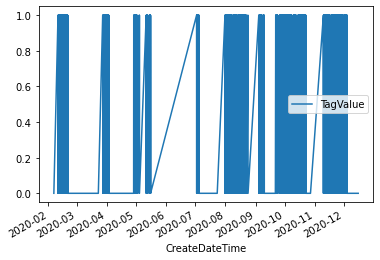

In [7]:
ID_86_2020.plot('CreateDateTime','TagValue')

In [4]:
###目标变量
TREE_1 = pd.DataFrame()
TREE_2 = pd.DataFrame()
TREE_1 = ID_51_2020[(ID_51_2020['CreateDateTime']>'2020-02-01 00:00:00')&(ID_51_2020['CreateDateTime']<'2020-11-01 00:00:00')]
TREE_1 = TREE_1.copy()
TREE_1.rename(columns = {'TagValue':'51_Foerderdruck'}, inplace=True)
TREE_1 = TREE_1.drop('TagId',axis = 1)


###特征合并函数
def zusammen(data,TREE_1):
    data = data[(data['CreateDateTime']>'2020-02-01 00:00:00')&(data['CreateDateTime']<'2020-11-01 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_1 = TREE_1.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_1 = TREE_1.reset_index('CreateDateTime')
    return TREE_1

def zusammen_ohneTagId(data,TREE_1):
    data = data[(data['CreateDateTime']>'2020-02-01 00:00:00')&(data['CreateDateTime']<'2020-11-01 00:00:00')]
    TREE_1 = TREE_1.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_1 = TREE_1.reset_index('CreateDateTime')
    return TREE_1


###滤网特征处理
frames = [ID_133_2020.drop('TagId',axis = 1), ID_134_2020.drop('TagId',axis = 1), ID_135_2020.drop('TagId',axis = 1), ID_136_2020.drop('TagId',axis = 1), ID_137_2020.drop('TagId',axis = 1), ID_138_2020.drop('TagId',axis = 1)]
ID_133_bis_138_2020 = pd.concat(frames)
ID_133_bis_138_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_133_bis_138_2020 = ID_133_bis_138_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_133_bis_138_2020 = ID_133_bis_138_2020.reset_index()
ID_133_bis_138_2020 = ID_133_bis_138_2020.drop('index',axis = 1)

frames = [ID_141_2020.drop('TagId',axis = 1), ID_142_2020.drop('TagId',axis = 1), ID_143_2020.drop('TagId',axis = 1), ID_144_2020.drop('TagId',axis = 1), ID_145_2020.drop('TagId',axis = 1), ID_146_2020.drop('TagId',axis = 1)]
ID_141_bis_146_2020 = pd.concat(frames)
ID_141_bis_146_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_141_bis_146_2020 = ID_141_bis_146_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_141_bis_146_2020 = ID_141_bis_146_2020.reset_index()
ID_141_bis_146_2020 = ID_141_bis_146_2020.drop('index',axis = 1)


###Turbokonus 特征处理
frames = [ID_139_2020.drop('TagId',axis = 1), ID_140_2020.drop('TagId',axis = 1)]
ID_139_bis_140_2020 = pd.concat(frames)
ID_139_bis_140_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_139_bis_140_2020 = ID_139_bis_140_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_139_bis_140_2020 = ID_139_bis_140_2020.reset_index()
ID_139_bis_140_2020 = ID_139_bis_140_2020.drop('index',axis = 1)

frames = [ID_147_2020.drop('TagId',axis = 1), ID_148_2020.drop('TagId',axis = 1)]
ID_147_bis_148_2020 = pd.concat(frames)
ID_147_bis_148_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_147_bis_148_2020 = ID_147_bis_148_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_147_bis_148_2020 = ID_147_bis_148_2020.reset_index()
ID_147_bis_148_2020 = ID_147_bis_148_2020.drop('index',axis = 1)


###合并特征
TREE_1 = zusammen(ID_85_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'85_Eckventil_ABS-8.1'}, inplace=True)
TREE_1 = zusammen(ID_45_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'45_Laufmeldung-Vibrationssieb_BB-8.1'}, inplace=True)
TREE_1 = zusammen(ID_13_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'13_Vollmelder_ABS-8.1'}, inplace=True)
TREE_1 = zusammen(ID_70_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'70_Hertz-Schleuse_ABS-8.1'}, inplace=True)
TREE_1 = zusammen(ID_72_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'72_Hertz-Schleuse_BB-8.1'}, inplace=True)
TREE_1 = zusammen_ohneTagId(ID_133_bis_138_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'133-138_Filterabreinigung_ABS-8.1'}, inplace=True)
TREE_1 = zusammen_ohneTagId(ID_139_bis_140_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'139-140_Turbokonus Eckventile_ABS-8.1'}, inplace=True)

TREE_1 = zusammen(ID_86_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'86_Eckventil_ABS-8.2'}, inplace=True)
TREE_1 = zusammen(ID_48_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'48_Laufmeldung-Vibrationssieb_ABS-8.2'}, inplace=True)
TREE_1 = zusammen(ID_17_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'17_Vollmelder_ABS-8.2'}, inplace=True)
TREE_1 = zusammen(ID_71_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'71_Hertz-Schleuse_ABS-8.2'}, inplace=True)
TREE_1 = zusammen(ID_73_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'73_Hertz-Schleuse_BB-8.2'}, inplace=True)
TREE_1 = zusammen_ohneTagId(ID_141_bis_146_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'141-146_Filterabreinigung_ABS-8.2'}, inplace=True)
TREE_1 = zusammen_ohneTagId(ID_147_bis_148_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'147-148_Turbokonus-Eckventile_ABS-8.2'}, inplace=True)


TREE_1['85_Eckventil_ABS-8.1'] = TREE_1['85_Eckventil_ABS-8.1'].fillna(method = "ffill")
TREE_1['45_Laufmeldung-Vibrationssieb_BB-8.1'] = TREE_1['45_Laufmeldung-Vibrationssieb_BB-8.1'].fillna(method = "ffill")
TREE_1['13_Vollmelder_ABS-8.1'] = TREE_1['13_Vollmelder_ABS-8.1'].fillna(method = "ffill")
TREE_1['70_Hertz-Schleuse_ABS-8.1'] = TREE_1['70_Hertz-Schleuse_ABS-8.1'].fillna(method = "ffill")
TREE_1['72_Hertz-Schleuse_BB-8.1'] = TREE_1['72_Hertz-Schleuse_BB-8.1'].fillna(method = "ffill")
TREE_1['133-138_Filterabreinigung_ABS-8.1'] = TREE_1['133-138_Filterabreinigung_ABS-8.1'].fillna(method = "ffill")
TREE_1['139-140_Turbokonus Eckventile_ABS-8.1'] = TREE_1['139-140_Turbokonus Eckventile_ABS-8.1'].fillna(method = "ffill")
TREE_1['CreateDateTime_Differenz'] = TREE_1['CreateDateTime'].diff().dt.total_seconds()

TREE_1['86_Eckventil_ABS-8.2'] = TREE_1['86_Eckventil_ABS-8.2'].fillna(method = "ffill")
TREE_1['48_Laufmeldung-Vibrationssieb_ABS-8.2'] = TREE_1['48_Laufmeldung-Vibrationssieb_ABS-8.2'].fillna(method = "ffill")
TREE_1['17_Vollmelder_ABS-8.2'] = TREE_1['17_Vollmelder_ABS-8.2'].fillna(method = "ffill")
TREE_1['71_Hertz-Schleuse_ABS-8.2'] = TREE_1['71_Hertz-Schleuse_ABS-8.2'].fillna(method = "ffill")
TREE_1['73_Hertz-Schleuse_BB-8.2'] = TREE_1['73_Hertz-Schleuse_BB-8.2'].fillna(method = "ffill")
TREE_1['141-146_Filterabreinigung_ABS-8.2'] = TREE_1['141-146_Filterabreinigung_ABS-8.2'].fillna(method = "ffill")
TREE_1['147-148_Turbokonus-Eckventile_ABS-8.2'] = TREE_1['147-148_Turbokonus-Eckventile_ABS-8.2'].fillna(method = "ffill")


###对过长停机时间做判断
TREE_1.loc[TREE_1['CreateDateTime_Differenz'] > 3600]

def NaNjgtc(data):
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'133-138_Filterabreinigung_ABS-8.1'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'141-146_Filterabreinigung_ABS-8.2'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data['timestamp'] = data['CreateDateTime'].values.astype(np.int64) // 10 ** 6
    s = data.set_index('timestamp')['51_Foerderdruck'].interpolate(method='index',inpalce=True)
    data = pd.merge(left=data, right=s, on=['timestamp'])
    data['51_Foerderdruck_x'] = data['51_Foerderdruck_y']
    data = data.drop('51_Foerderdruck_y',axis=1)
    data = data.drop('timestamp',axis=1)
    data = data.copy()
    data.rename(columns = {'51_Foerderdruck_x':'51_Foerderdruck'}, inplace=True)
    return data

TREE_2 = NaNjgtc(TREE_1)


###构建新的延时特征
##长延时特征
#传感器85正反向计时，传感器45正向计时
gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_0'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_1'] = ID_85_2020['CreateDateTime']
gh['TagValue'] = ID_85_2020['TagValue']
gh['TagId'] = ID_85_2020['TagId']
er = pd.DataFrame()
er['CreateDateTime'] = ID_45_2020['CreateDateTime']
er['CreateDateTime_45_0'] = ID_45_2020['CreateDateTime']
er['TagValue'] = ID_45_2020['TagValue']
er['TagId'] = ID_45_2020['TagId']

TREE_2 = zusammen(gh,TREE_2)
TREE_2['CreateDateTime_85_0'] = TREE_2['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_85_1'] = TREE_2['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_2['deltatime_85_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_85_0'] 
TREE_2['deltatime_85_0'] = TREE_2['deltatime_85_0'].dt.total_seconds()
TREE_2['deltatime_85_1'] = TREE_2['CreateDateTime_85_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_85_1'] = TREE_2['deltatime_85_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_1',axis = 1)
TREE_2 = zusammen(er,TREE_2)
TREE_2['CreateDateTime_45_0'] = TREE_2['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_2['deltatime_45_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_45_0'] 
TREE_2['deltatime_45_0'] = TREE_2['deltatime_45_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_45_0',axis = 1)

#传感器86正反向计时，传感器48正向计时
gh1 = pd.DataFrame()
gh1['CreateDateTime'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_0'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_1'] = ID_86_2020['CreateDateTime']
gh1['TagValue'] = ID_86_2020['TagValue']
gh1['TagId'] = ID_86_2020['TagId']
er1 = pd.DataFrame()
er1['CreateDateTime'] = ID_48_2020['CreateDateTime']
er1['CreateDateTime_48_0'] = ID_48_2020['CreateDateTime']
er1['TagValue'] = ID_48_2020['TagValue']
er1['TagId'] = ID_48_2020['TagId']

gh1 = gh1[(gh1['CreateDateTime']>'2020-02-01 00:00:00')&(gh1['CreateDateTime']<'2020-11-09 18:50:00')]
gh1 = gh1.drop('TagId',axis = 1) 
TREE_2 = TREE_2.set_index('CreateDateTime').join(gh1.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
TREE_2 = TREE_2.reset_index('CreateDateTime')
TREE_2['CreateDateTime_86_0'] = TREE_2['CreateDateTime_86_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_86_1'] = TREE_2['CreateDateTime_86_1'].fillna(method = "bfill")
TREE_2['deltatime_86_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_86_0'] 
TREE_2['deltatime_86_0'] = TREE_2['deltatime_86_0'].dt.total_seconds()
TREE_2['deltatime_86_1'] = TREE_2['CreateDateTime_86_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_86_1'] = TREE_2['deltatime_86_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_86_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_86_1',axis = 1)
TREE_2 = zusammen(er1,TREE_2)
TREE_2['CreateDateTime_48_0'] = TREE_2['CreateDateTime_48_0'].fillna(method = "ffill")
TREE_2['deltatime_48_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_48_0'] 
TREE_2['deltatime_48_0'] = TREE_2['deltatime_48_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_48_0',axis = 1)

#传感器133-138正向计时，传感器141-146正向计时
op = pd.DataFrame()
op['CreateDateTime'] = ID_133_bis_138_2020['CreateDateTime']
op['CreateDateTime_133_bis_138_0'] = ID_133_bis_138_2020['CreateDateTime']
op['TagValue'] = ID_133_bis_138_2020['TagValue']
op1 = pd.DataFrame()
op1['CreateDateTime'] = ID_141_bis_146_2020['CreateDateTime']
op1['CreateDateTime_141_bis_146_0'] = ID_141_bis_146_2020['CreateDateTime']
op1['TagValue'] = ID_141_bis_146_2020['TagValue']

TREE_2 = zusammen_ohneTagId(op,TREE_2)
TREE_2['CreateDateTime_133_bis_138_0'] = TREE_2['CreateDateTime_133_bis_138_0'].fillna(method = "ffill")
TREE_2['deltatime_133_bis_138_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_133_bis_138_0'] 
TREE_2['deltatime_133_bis_138_0'] = TREE_2['deltatime_133_bis_138_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_133_bis_138_0',axis = 1)
TREE_2 = zusammen_ohneTagId(op1,TREE_2)
TREE_2['CreateDateTime_141_bis_146_0'] = TREE_2['CreateDateTime_141_bis_146_0'].fillna(method = "ffill")
TREE_2['deltatime_141_bis_146_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_141_bis_146_0'] 
TREE_2['deltatime_141_bis_146_0'] = TREE_2['deltatime_141_bis_146_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_141_bis_146_0',axis = 1)

#传感器139-140正向计时，传感器147-148正向计时
nm = pd.DataFrame()
nm['CreateDateTime'] = ID_139_bis_140_2020['CreateDateTime']
nm['CreateDateTime_139_bis_140_0'] = ID_139_bis_140_2020['CreateDateTime']
nm['TagValue'] = ID_139_bis_140_2020['TagValue']
nm1 = pd.DataFrame()
nm1['CreateDateTime'] = ID_147_bis_148_2020['CreateDateTime']
nm1['CreateDateTime_147_bis_148_0'] = ID_147_bis_148_2020['CreateDateTime']
nm1['TagValue'] = ID_147_bis_148_2020['TagValue']

TREE_2 = zusammen_ohneTagId(nm,TREE_2)
TREE_2['CreateDateTime_139_bis_140_0'] = TREE_2['CreateDateTime_139_bis_140_0'].fillna(method = "ffill")
TREE_2['deltatime_139_bis_140_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_139_bis_140_0'] 
TREE_2['deltatime_139_bis_140_0'] = TREE_2['deltatime_139_bis_140_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_139_bis_140_0',axis = 1)
TREE_2 = zusammen_ohneTagId(nm1,TREE_2)
TREE_2['CreateDateTime_147_bis_148_0'] = TREE_2['CreateDateTime_147_bis_148_0'].fillna(method = "ffill")
TREE_2['deltatime_147_bis_148_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_147_bis_148_0'] 
TREE_2['deltatime_147_bis_148_0'] = TREE_2['deltatime_147_bis_148_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_147_bis_148_0',axis = 1)

#时间戳
TREE_2=TREE_2.copy()
TREE_2['timestamp'] = TREE_2['CreateDateTime'].values.astype(np.int64) // 10 ** 6 

In [5]:
TREE_2

,CreateDateTime,51_Foerderdruck,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,...,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,timestamp
0,2020-02-06 13:05:56.982,-4.050903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1580994356982
1,2020-02-06 13:05:57.207,-2.314819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.429,0.225,0.225,369345.480,0.225,0.225,0.225,0.225,0.225,1580994357207
2,2020-02-06 13:05:57.411,-4.050903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.225,0.429,0.429,369345.276,0.429,0.429,0.429,0.429,0.429,1580994357411
3,2020-02-06 13:05:58.025,-2.314819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.611,1.043,1.043,369344.662,1.043,1.043,1.043,1.043,1.043,1580994358025
4,2020-02-06 13:05:58.230,-3.472168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.406,1.248,1.248,369344.457,1.248,1.248,1.248,1.248,1.248,1580994358230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503505,2020-10-31 23:57:51.244,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1385.935,386300.509,758748.900,386300.502,150.243,386300.510,539.206,386300.511,1604188671244
34503506,2020-10-31 23:57:51.671,0.578735,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1386.362,386300.936,758748.473,386300.929,150.670,386300.937,539.633,386300.938,1604188671671
34503507,2020-10-31 23:57:52.079,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1386.770,386301.344,758748.065,386301.337,151.078,386301.345,540.041,386301.346,1604188672079
34503508,2020-11-09 18:43:40.144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000,0.000,1145049.402,758899.143,1145049.410,759288.106,1145049.411,1604947420144


In [6]:
TREE_2.isnull().sum()

CreateDateTime                              0
51_Foerderdruck                             2
85_Eckventil_ABS-8.1                        2
45_Laufmeldung-Vibrationssieb_BB-8.1        2
13_Vollmelder_ABS-8.1                       2
70_Hertz-Schleuse_ABS-8.1                   2
72_Hertz-Schleuse_BB-8.1                    2
133-138_Filterabreinigung_ABS-8.1           2
139-140_Turbokonus Eckventile_ABS-8.1       2
86_Eckventil_ABS-8.2                        2
48_Laufmeldung-Vibrationssieb_ABS-8.2       2
17_Vollmelder_ABS-8.2                       2
71_Hertz-Schleuse_ABS-8.2                   2
73_Hertz-Schleuse_BB-8.2                    2
141-146_Filterabreinigung_ABS-8.2           2
147-148_Turbokonus-Eckventile_ABS-8.2       2
CreateDateTime_Differenz                    3
deltatime_85_0                              2
deltatime_85_1                           1414
deltatime_45_0                              2
deltatime_86_0                              0
deltatime_86_1                    

In [7]:
TREE_2 = TREE_2.dropna()
TREE_2 = TREE_2.reset_index(drop=True)
TREE_2.isnull().sum()

CreateDateTime                           0
51_Foerderdruck                          0
85_Eckventil_ABS-8.1                     0
45_Laufmeldung-Vibrationssieb_BB-8.1     0
13_Vollmelder_ABS-8.1                    0
70_Hertz-Schleuse_ABS-8.1                0
72_Hertz-Schleuse_BB-8.1                 0
133-138_Filterabreinigung_ABS-8.1        0
139-140_Turbokonus Eckventile_ABS-8.1    0
86_Eckventil_ABS-8.2                     0
48_Laufmeldung-Vibrationssieb_ABS-8.2    0
17_Vollmelder_ABS-8.2                    0
71_Hertz-Schleuse_ABS-8.2                0
73_Hertz-Schleuse_BB-8.2                 0
141-146_Filterabreinigung_ABS-8.2        0
147-148_Turbokonus-Eckventile_ABS-8.2    0
CreateDateTime_Differenz                 0
deltatime_85_0                           0
deltatime_85_1                           0
deltatime_45_0                           0
deltatime_86_0                           0
deltatime_86_1                           0
deltatime_48_0                           0
deltatime_1

In [8]:
TREE_2.to_csv(r'D:\留德十年\TUD\ADP\Data\LGBM-train-2020.csv')

In [2]:
TREE_2 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\LGBM-train-2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [3]:
columns = [col for col in TREE_2.columns if col not in ['CreateDateTime','timestamp', '51_Foerderdruck']]
columns

['85_Eckventil_ABS-8.1',
 '45_Laufmeldung-Vibrationssieb_BB-8.1',
 '13_Vollmelder_ABS-8.1',
 '70_Hertz-Schleuse_ABS-8.1',
 '72_Hertz-Schleuse_BB-8.1',
 '133-138_Filterabreinigung_ABS-8.1',
 '139-140_Turbokonus Eckventile_ABS-8.1',
 '86_Eckventil_ABS-8.2',
 '48_Laufmeldung-Vibrationssieb_ABS-8.2',
 '17_Vollmelder_ABS-8.2',
 '71_Hertz-Schleuse_ABS-8.2',
 '73_Hertz-Schleuse_BB-8.2',
 '141-146_Filterabreinigung_ABS-8.2',
 '147-148_Turbokonus-Eckventile_ABS-8.2',
 'CreateDateTime_Differenz',
 'deltatime_85_0',
 'deltatime_85_1',
 'deltatime_45_0',
 'deltatime_86_0',
 'deltatime_86_1',
 'deltatime_48_0',
 'deltatime_133_bis_138_0',
 'deltatime_141_bis_146_0',
 'deltatime_139_bis_140_0',
 'deltatime_147_bis_148_0']

Loading data...
Starting training...
2022-10-26 01:40:44.266559
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.103384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	training's auc: 0.856525	training's rmse: 163.425	valid_1's auc: 0.856558	valid_1's rmse: 163.457
[2]	training's auc: 0.856367	training's rmse: 147.432	valid_1's auc: 0.856398	valid_1's rmse: 147.462
[3]	training's auc: 0.856398	training's rmse: 133.034	valid_1's auc: 0.856431	valid_1's rmse: 133.061
[4]	training's auc: 0.856455	training's rmse: 120.133	valid_1's auc: 0.85649	valid_1's rmse: 120.157
[5]	training's auc: 0.856484	training's rmse: 108.518	valid_1's auc: 0.85652	valid_1's rmse: 108.541
[6]	training's auc: 0.856483	training's rmse: 98.11	valid_1's auc: 0.85652	valid_1's rmse: 98.1298
[7]	training's auc: 0.857241	training's rmse: 88.8055	valid_1's auc: 0.85726	valid_1's rmse: 88.8226

[79]	training's auc: 0.934771	training's rmse: 16.7203	valid_1's auc: 0.935041	valid_1's rmse: 16.7212
[80]	training's auc: 0.935178	training's rmse: 16.7064	valid_1's auc: 0.935474	valid_1's rmse: 16.7076
[81]	training's auc: 0.935066	training's rmse: 16.6754	valid_1's auc: 0.935339	valid_1's rmse: 16.6768
[82]	training's auc: 0.935256	training's rmse: 16.6539	valid_1's auc: 0.935573	valid_1's rmse: 16.6558
[83]	training's auc: 0.935493	training's rmse: 16.6398	valid_1's auc: 0.935792	valid_1's rmse: 16.6421
[84]	training's auc: 0.935369	training's rmse: 16.6148	valid_1's auc: 0.935674	valid_1's rmse: 16.6174
[85]	training's auc: 0.935527	training's rmse: 16.5862	valid_1's auc: 0.935804	valid_1's rmse: 16.5885
[86]	training's auc: 0.935616	training's rmse: 16.5742	valid_1's auc: 0.935898	valid_1's rmse: 16.5765
[87]	training's auc: 0.935616	training's rmse: 16.5609	valid_1's auc: 0.935901	valid_1's rmse: 16.5634
[88]	training's auc: 0.935384	training's rmse: 16.5338	valid_1's auc: 0.9

[159]	training's auc: 0.936967	training's rmse: 15.6063	valid_1's auc: 0.937096	valid_1's rmse: 15.6239
[160]	training's auc: 0.93688	training's rmse: 15.5952	valid_1's auc: 0.937012	valid_1's rmse: 15.6129
[161]	training's auc: 0.936926	training's rmse: 15.5877	valid_1's auc: 0.937051	valid_1's rmse: 15.6052
[162]	training's auc: 0.93685	training's rmse: 15.5821	valid_1's auc: 0.936967	valid_1's rmse: 15.5997
[163]	training's auc: 0.936945	training's rmse: 15.5731	valid_1's auc: 0.93706	valid_1's rmse: 15.5908
[164]	training's auc: 0.937044	training's rmse: 15.567	valid_1's auc: 0.937142	valid_1's rmse: 15.5847
[165]	training's auc: 0.937075	training's rmse: 15.5615	valid_1's auc: 0.93717	valid_1's rmse: 15.5795
[166]	training's auc: 0.937029	training's rmse: 15.5454	valid_1's auc: 0.937116	valid_1's rmse: 15.5635
[167]	training's auc: 0.937155	training's rmse: 15.5367	valid_1's auc: 0.937257	valid_1's rmse: 15.5551
[168]	training's auc: 0.937093	training's rmse: 15.5338	valid_1's auc

[239]	training's auc: 0.937899	training's rmse: 14.9676	valid_1's auc: 0.937909	valid_1's rmse: 14.9958
[240]	training's auc: 0.937888	training's rmse: 14.9546	valid_1's auc: 0.937898	valid_1's rmse: 14.983
[241]	training's auc: 0.938006	training's rmse: 14.9442	valid_1's auc: 0.938021	valid_1's rmse: 14.9725
[242]	training's auc: 0.938019	training's rmse: 14.9393	valid_1's auc: 0.938036	valid_1's rmse: 14.9674
[243]	training's auc: 0.938029	training's rmse: 14.9247	valid_1's auc: 0.938047	valid_1's rmse: 14.9533
[244]	training's auc: 0.938034	training's rmse: 14.9197	valid_1's auc: 0.93806	valid_1's rmse: 14.9489
[245]	training's auc: 0.938021	training's rmse: 14.9142	valid_1's auc: 0.938032	valid_1's rmse: 14.9435
[246]	training's auc: 0.938048	training's rmse: 14.9098	valid_1's auc: 0.938049	valid_1's rmse: 14.9393
[247]	training's auc: 0.938094	training's rmse: 14.9027	valid_1's auc: 0.938108	valid_1's rmse: 14.9323
[248]	training's auc: 0.938035	training's rmse: 14.8933	valid_1's 

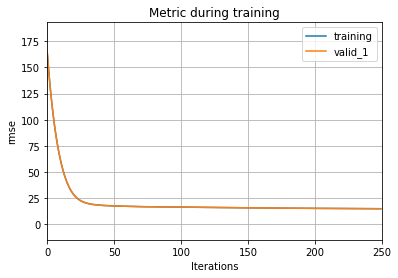

Plotting feature importances...


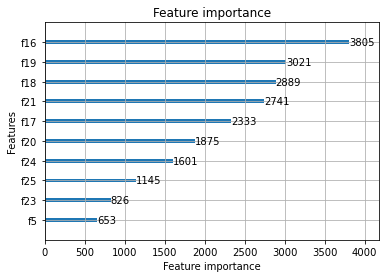

Plotting 4th tree...


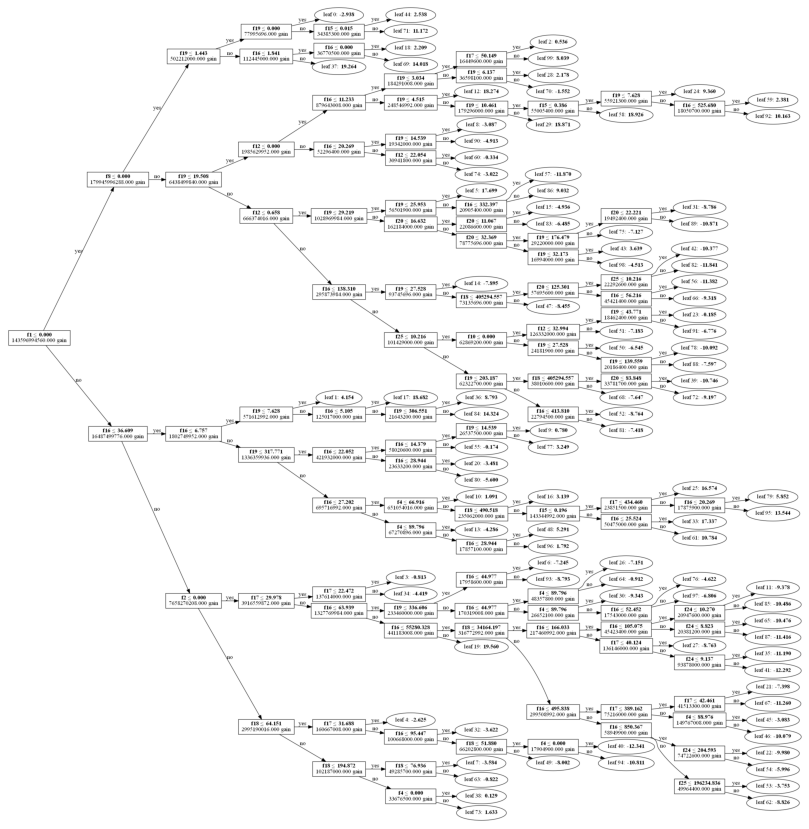

Plotting 4th tree with graphviz...
Save model...
Start prediction...
The RMSE of the predicted result is:
14.901869135251449
The MAE of the predicted result is:
7.702714304471367
End
2022-10-26 02:07:02.121129


In [4]:
print('Loading data...')
X = TREE_2[columns]
y = TREE_2['51_Foerderdruck']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse', 'auc'},
    'max_depth': 10,
    'num_leaves': 100,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

print('Starting training...')
print(datetime.datetime.now())
# train
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=250,
    valid_sets=[lgb_train, lgb_test],
    feature_name=[f'f{i + 1}' for i in range(X_train.shape[-1])],
    callbacks=[
        lgb.record_evaluation(evals_result)
    ]
)

print('Plotting metrics recorded during training...') # Draw the training results
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()

print('Plotting feature importances...') # Painting features in order of importance
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

print('Plotting 4th tree...')  # Draw the 4th of these decision tree
ax = lgb.plot_tree(gbm, tree_index=3, figsize=(15, 15), show_info=['split_gain'])
plt.show()

print('Plotting 4th tree with graphviz...')# export decision tree pdf image to local
graph = lgb.create_tree_digraph(gbm, tree_index=3, name='Tree4')
graph.render(view=True)


# Save model
print('Save model...')
# Save the model to a file
gbm.save_model('model.txt')

# Start prediction
print('Start prediction...')
# Predictions
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Evaluations
# The RMSE of the predicted results is
print('The RMSE of the predicted result is:')
print(mean_squared_error(y_test, y_pred) ** 0.5)
# The MAE of the predicted results is
print('The MAE of the predicted result is:')
print(mean_absolute_error(y_test, y_pred))
print('End')
print(datetime.datetime.now())

Plotting 94th tree...


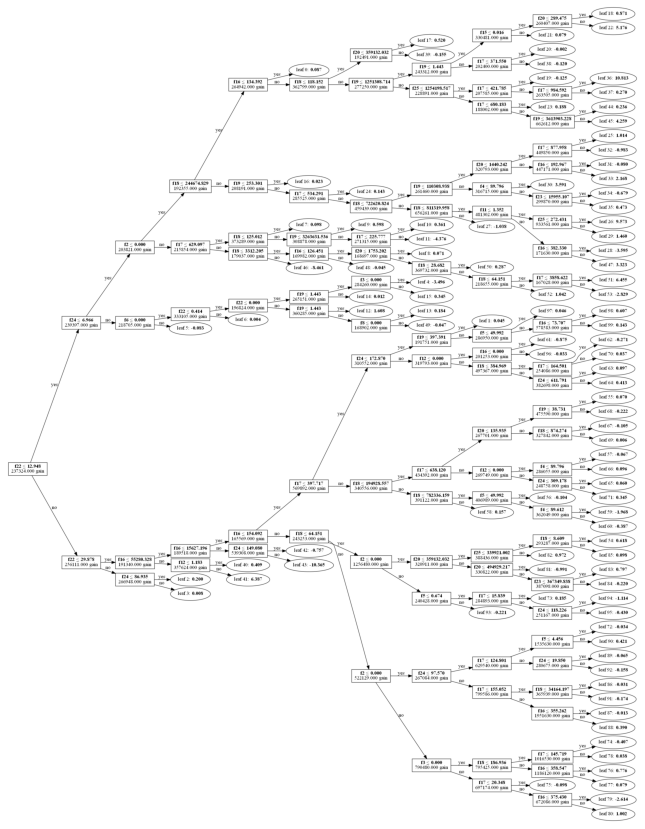

In [12]:
### Draw the 94th of these decision tree
print('Plotting 94th tree...')  
ax = lgb.plot_tree(gbm, tree_index=93, figsize=(15, 15), show_info=['split_gain'])
plt.show()

In [5]:
X_test['y_pred'] = y_pred
right = TREE_2['CreateDateTime']
left = X_test
result = pd.merge(left, right, how='left', left_index=True, right_index=True)
result['y_test'] = y_test
result = result.sort_values(by=['CreateDateTime'])
result

,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,48_Laufmeldung-Vibrationssieb_ABS-8.2,17_Vollmelder_ABS-8.2,...,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,y_pred,CreateDateTime,y_test
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.885,369342.820,2.885,2.885,2.885,2.885,2.885,-31.524050,2020-02-06 13:05:59.867,-2.893555
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.734,369340.971,4.734,4.734,4.734,4.734,4.734,-22.374107,2020-02-06 13:06:01.716,-5.208374
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.176,369339.529,6.176,6.176,6.176,6.176,6.176,-19.827805,2020-02-06 13:06:03.158,-2.314819
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.977,369338.728,6.977,6.977,6.977,6.977,6.977,-12.199138,2020-02-06 13:06:03.959,-1.157349
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.207,369337.498,8.207,8.207,8.207,8.207,8.207,-11.387933,2020-02-06 13:06:05.189,-2.314819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34502057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,385968.383,759081.026,385968.376,0.611,385968.384,207.080,385968.385,-271.704292,2020-10-31 23:52:19.118,-269.675900
34502058,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,385968.598,759080.811,385968.591,0.826,385968.599,207.295,385968.600,-272.946181,2020-10-31 23:52:19.333,-269.097200
34502063,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,385969.607,759079.802,385969.600,1.835,385969.608,208.304,385969.609,-274.671759,2020-10-31 23:52:20.342,-273.726810
34502075,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,385973.316,759076.093,385973.309,5.544,385973.317,212.013,385973.318,-282.276048,2020-10-31 23:52:24.051,-278.356410


(-500.0, 20.0)

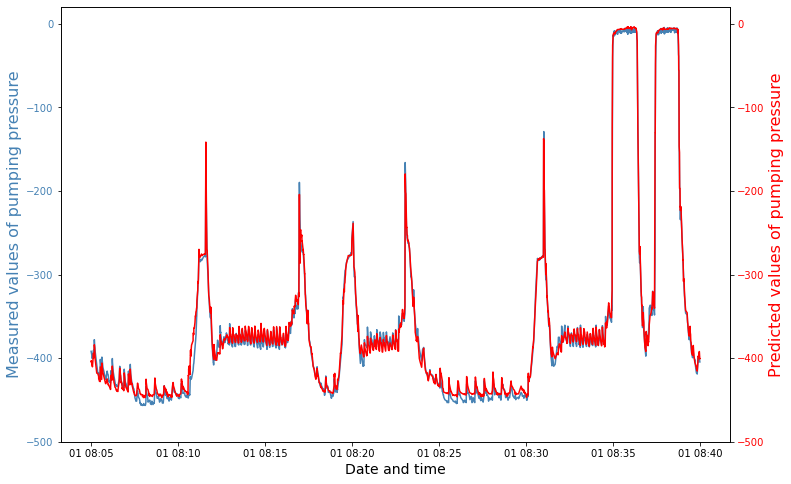

In [6]:
Daten_1 = result


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-04-01 08:05:00')&(Daten_1['CreateDateTime']<'2020-04-01 08:40:00')]


fig, ax = plt.subplots(figsize=(12, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Date and time', fontsize=14)
ax.set_ylabel('Measured values of pumping pressure', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((-500, 20))


ax2 = ax.twinx()
ax2.set_ylabel('Predicted values of pumping pressure', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-500, 20))

In [2]:
# # 保存模型
# print('Save model...')#保存模型
# # 保存模型到文件中
# gbm.save_model('model.txt')

# lgb.Booster加载模型
print('加载模型用于预测')
bst = lgb.Booster(model_file=r'C:\Users\XYC/model.txt')

加载模型用于预测


In [3]:
TREE_2 = pd.DataFrame()
TREE_2 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\LGBM-train-2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [4]:
TREE_2 = TREE_2[(TREE_2['CreateDateTime']<'2020-04-05 08:05:00')]

In [5]:
TREE_2

,CreateDateTime,51_Foerderdruck,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,...,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,timestamp
0,2020-02-06 13:05:57.207,-2.314819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.429,0.225,0.225,369345.480,0.225,0.225,0.225,0.225,0.225,1580994357207
1,2020-02-06 13:05:57.411,-4.050903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.225,0.429,0.429,369345.276,0.429,0.429,0.429,0.429,0.429,1580994357411
2,2020-02-06 13:05:58.025,-2.314819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.611,1.043,1.043,369344.662,1.043,1.043,1.043,1.043,1.043,1580994358025
3,2020-02-06 13:05:58.230,-3.472168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.406,1.248,1.248,369344.457,1.248,1.248,1.248,1.248,1.248,1580994358230
4,2020-02-06 13:05:58.437,-4.050903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.199,1.455,1.455,369344.250,1.455,1.455,1.455,1.455,1.455,1580994358437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723280,2020-04-03 02:14:36.539,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2203779.189,932380.235,1411.778,2203779.179,932380.235,6756.620,626.030,6924.937,8.277,1585880076539
9723281,2020-04-03 02:14:36.741,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2203778.987,932380.437,1411.980,2203778.977,932380.437,6756.822,626.232,6925.139,8.479,1585880076741
9723282,2020-04-03 02:14:36.943,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2203778.785,932380.639,1412.182,2203778.775,932380.639,6757.024,626.434,6925.341,8.681,1585880076943
9723283,2020-04-03 02:14:37.145,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2203778.583,932380.841,1412.384,2203778.573,932380.841,6757.226,626.636,6925.543,8.883,1585880077145


In [6]:
columns = [col for col in TREE_2.columns if col not in ['CreateDateTime','timestamp', '51_Foerderdruck']]
columns

['85_Eckventil_ABS-8.1',
 '45_Laufmeldung-Vibrationssieb_BB-8.1',
 '13_Vollmelder_ABS-8.1',
 '70_Hertz-Schleuse_ABS-8.1',
 '72_Hertz-Schleuse_BB-8.1',
 '133-138_Filterabreinigung_ABS-8.1',
 '139-140_Turbokonus Eckventile_ABS-8.1',
 '86_Eckventil_ABS-8.2',
 '48_Laufmeldung-Vibrationssieb_ABS-8.2',
 '17_Vollmelder_ABS-8.2',
 '71_Hertz-Schleuse_ABS-8.2',
 '73_Hertz-Schleuse_BB-8.2',
 '141-146_Filterabreinigung_ABS-8.2',
 '147-148_Turbokonus-Eckventile_ABS-8.2',
 'CreateDateTime_Differenz',
 'deltatime_85_0',
 'deltatime_85_1',
 'deltatime_45_0',
 'deltatime_86_0',
 'deltatime_86_1',
 'deltatime_48_0',
 'deltatime_133_bis_138_0',
 'deltatime_141_bis_146_0',
 'deltatime_139_bis_140_0',
 'deltatime_147_bis_148_0']

In [7]:
X_test_20 = TREE_2[columns]
y_test_20 = TREE_2['51_Foerderdruck']
X_test_20

,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,48_Laufmeldung-Vibrationssieb_ABS-8.2,17_Vollmelder_ABS-8.2,...,deltatime_85_0,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.225,31.429,0.225,0.225,369345.480,0.225,0.225,0.225,0.225,0.225
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.429,31.225,0.429,0.429,369345.276,0.429,0.429,0.429,0.429,0.429
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.043,30.611,1.043,1.043,369344.662,1.043,1.043,1.043,1.043,1.043
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.248,30.406,1.248,1.248,369344.457,1.248,1.248,1.248,1.248,1.248
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455,30.199,1.455,1.455,369344.250,1.455,1.455,1.455,1.455,1.455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7995.490,2203779.189,932380.235,1411.778,2203779.179,932380.235,6756.620,626.030,6924.937,8.277
9723281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7995.692,2203778.987,932380.437,1411.980,2203778.977,932380.437,6756.822,626.232,6925.139,8.479
9723282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7995.894,2203778.785,932380.639,1412.182,2203778.775,932380.639,6757.024,626.434,6925.341,8.681
9723283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7996.096,2203778.583,932380.841,1412.384,2203778.573,932380.841,6757.226,626.636,6925.543,8.883


In [8]:
print('Start prediction...')#开始预测
# 预测
y_pred_20 = bst.predict(X_test_20)# 评估
print('The RMSE of the predicted result is:')#预估结果的RMSE为
print(mean_squared_error(y_test_20, y_pred_20) ** 0.5)
print('The MAE of the predicted result is:')#预估结果的MAE为
print(mean_absolute_error(y_test_20, y_pred_20))

Start prediction...
The RMSE of the predicted result is:
15.97990890335698
The MAE of the predicted result is:
7.8406234507433


In [9]:
X_test_20 = X_test_20.copy()
X_test_20['y_pred_20'] = y_pred_20
left_20 = X_test_20
right_20 = TREE_2['CreateDateTime']
result_20 = pd.merge(left_20, right_20, how='left', left_index=True, right_index=True)
result_20['y_test_20'] = y_test_20
result_20

,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,48_Laufmeldung-Vibrationssieb_ABS-8.2,17_Vollmelder_ABS-8.2,...,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,y_pred_20,CreateDateTime,y_test_20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.225,369345.480,0.225,0.225,0.225,0.225,0.225,-36.851439,2020-02-06 13:05:57.207,-2.314819
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.429,369345.276,0.429,0.429,0.429,0.429,0.429,-39.015809,2020-02-06 13:05:57.411,-4.050903
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.043,369344.662,1.043,1.043,1.043,1.043,1.043,-49.640822,2020-02-06 13:05:58.025,-2.314819
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.248,369344.457,1.248,1.248,1.248,1.248,1.248,-56.054802,2020-02-06 13:05:58.230,-3.472168
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455,369344.250,1.455,1.455,1.455,1.455,1.455,-51.776628,2020-02-06 13:05:58.437,-4.050903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1411.778,2203779.179,932380.235,6756.620,626.030,6924.937,8.277,2.307207,2020-04-03 02:14:36.539,0.000000
9723281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1411.980,2203778.977,932380.437,6756.822,626.232,6925.139,8.479,2.307207,2020-04-03 02:14:36.741,0.000000
9723282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1412.182,2203778.775,932380.639,6757.024,626.434,6925.341,8.681,2.307207,2020-04-03 02:14:36.943,0.000000
9723283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1412.384,2203778.573,932380.841,6757.226,626.636,6925.543,8.883,2.707371,2020-04-03 02:14:37.145,0.000000


In [10]:
Daten_1 = result_20
Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-04-01 08:05:00')&(Daten_1['CreateDateTime']<'2020-04-01 08:40:00')]
Daten_1

,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,48_Laufmeldung-Vibrationssieb_ABS-8.2,17_Vollmelder_ABS-8.2,...,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,y_pred_20,CreateDateTime,y_test_20
9079855,1.0,0.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,51.084,394.710,780603.796,23.089,7.969,8.988,225.578,-402.936408,2020-04-01 08:05:00.100,-389.46771
9079856,1.0,0.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,51.290,394.504,780604.002,23.295,8.175,9.194,225.784,-402.951847,2020-04-01 08:05:00.306,-390.04630
9079857,1.0,0.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,51.699,394.095,780604.411,23.704,8.584,9.603,226.193,-404.139703,2020-04-01 08:05:00.715,-391.78250
9079858,1.0,0.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,52.107,393.687,780604.819,24.112,8.992,10.011,226.601,-404.145184,2020-04-01 08:05:01.123,-392.36111
9079859,1.0,0.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,52.313,393.481,780605.025,24.318,9.198,10.217,226.807,-402.957327,2020-04-01 08:05:01.329,-392.93991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088779,1.0,0.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,153.727,339.345,782702.312,4.698,0.621,2.461,163.305,-398.323525,2020-04-01 08:39:58.616,-402.19910
9088780,1.0,0.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,154.133,338.939,782702.718,5.104,1.027,2.867,163.711,-400.965069,2020-04-01 08:39:59.022,-403.93521
9088781,1.0,0.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,154.339,338.733,782702.924,5.310,1.233,3.073,163.917,-399.751672,2020-04-01 08:39:59.228,-405.09271
9088782,1.0,0.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,154.545,338.527,782703.130,5.516,1.439,3.279,164.123,-400.725217,2020-04-01 08:39:59.434,-404.51389


(-500.0, 20.0)

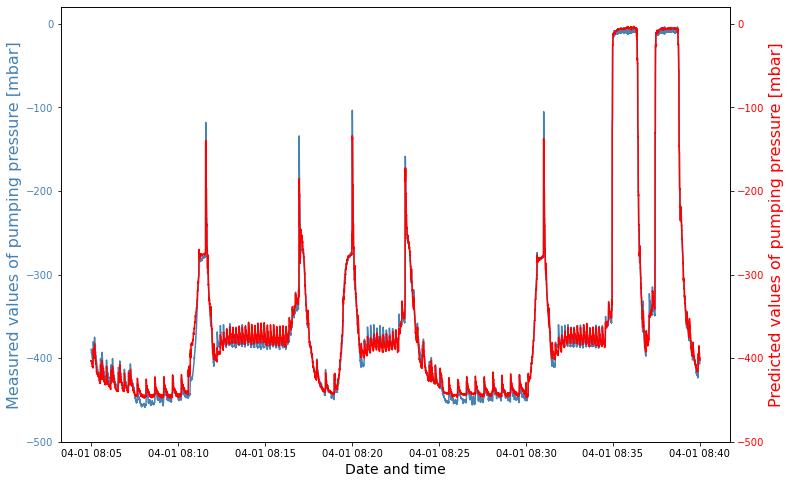

In [11]:



fig, ax = plt.subplots(figsize=(12, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Date and time', fontsize=14)
ax.set_ylabel('Measured values of pumping pressure [mbar]', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test_20, color=col1)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%m-%d %H:%M'))  # 横坐标标签显示的日期格式
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((-500, 20))


ax2 = ax.twinx()
ax2.set_ylabel('Predicted values of pumping pressure [mbar]', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_20, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-500, 20))

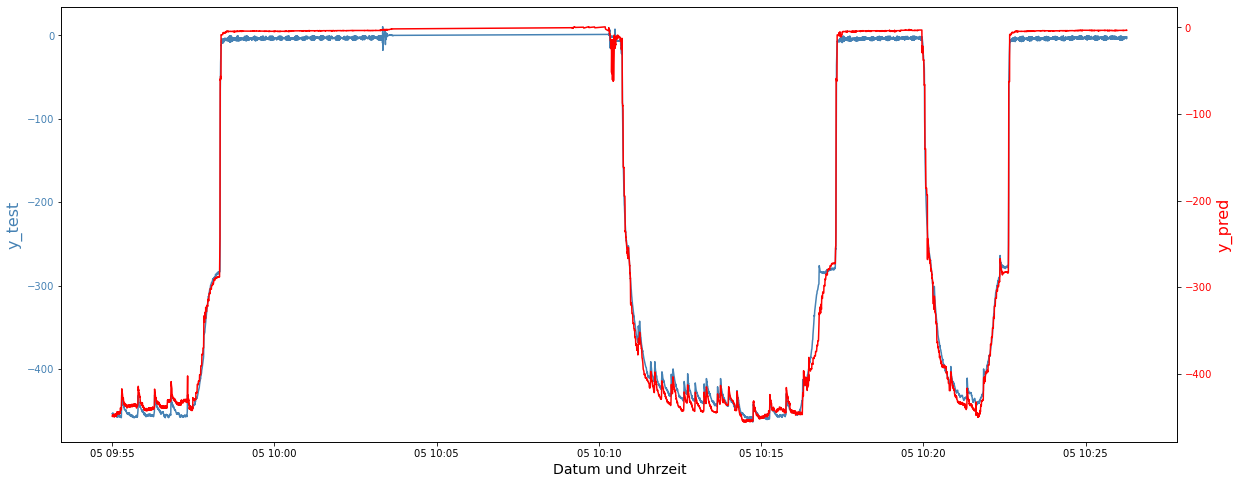

In [26]:
Daten_1 = result_20


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-03-05 09:55:00')&(Daten_1['CreateDateTime']<'2020-03-05 10:26:16')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test_20, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((0.5, 6))


ax2 = ax.twinx()
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_20, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
# plt.ylim((0.5, 6))

In [3]:
# # 保存模型
# print('Save model...')#保存模型
# # 保存模型到文件中
# gbm.save_model('model.txt')

# lgb.Booster加载模型
print('加载模型用于预测')
bst = lgb.Booster(model_file=r'C:\Users\XYC/model.txt')

加载模型用于预测


In [4]:
TREE_4 = pd.DataFrame()
TREE_4 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\LGBM-test-2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [5]:
columns = [col for col in TREE_4.columns if col not in ['CreateDateTime','timestamp', '51_Foerderdruck']]
columns

['85_Eckventil_ABS-8.1',
 '45_Laufmeldung-Vibrationssieb_BB-8.1',
 '13_Vollmelder_ABS-8.1',
 '70_Hertz-Schleuse_ABS-8.1',
 '72_Hertz-Schleuse_BB-8.1',
 '133-138_Filterabreinigung_ABS-8.1',
 '139-140_Turbokonus Eckventile_ABS-8.1',
 '86_Eckventil_ABS-8.2',
 '48_Laufmeldung-Vibrationssieb_ABS-8.2',
 '17_Vollmelder_ABS-8.2',
 '71_Hertz-Schleuse_ABS-8.2',
 '73_Hertz-Schleuse_BB-8.2',
 '141-146_Filterabreinigung_ABS-8.2',
 '147-148_Turbokonus-Eckventile_ABS-8.2',
 'CreateDateTime_Differenz',
 'deltatime_85_0',
 'deltatime_85_1',
 'deltatime_45_0',
 'deltatime_86_0',
 'deltatime_86_1',
 'deltatime_48_0',
 'deltatime_133_bis_138_0',
 'deltatime_141_bis_146_0',
 'deltatime_139_bis_140_0',
 'deltatime_147_bis_148_0']

In [6]:
X_test_21_09 = pd.DataFrame()
X_test_21_09 = TREE_4.drop('timestamp',axis = 1)
X_test_21_09 = X_test_21_09.drop('CreateDateTime',axis = 1)
X_test_21_09 = X_test_21_09.drop('51_Foerderdruck',axis = 1)
X_test_21_09

,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,48_Laufmeldung-Vibrationssieb_ABS-8.2,17_Vollmelder_ABS-8.2,...,deltatime_85_0,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0
0,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,1.0,1.0,...,143.997,34.745,311.911,144.008,34.745,0.000,22.806,7.000,6.574,184.581
1,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,1.0,1.0,...,144.196,34.546,312.110,144.207,34.546,0.199,23.005,7.199,6.773,184.780
2,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,1.0,1.0,...,144.593,34.149,312.507,144.604,34.149,0.596,23.402,7.596,7.170,185.177
3,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,1.0,1.0,...,144.789,33.953,312.703,144.800,33.953,0.792,23.598,7.792,7.366,185.373
4,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,1.0,1.0,...,145.007,33.735,312.921,145.018,33.735,1.010,23.816,8.010,7.584,185.591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8503440,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,217.509,1.012,473.397,217.519,1.012,23073.374,17.579,1.029,27.820,245.769
8503441,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,217.711,0.810,473.599,217.721,0.810,23073.576,17.781,1.231,28.022,245.971
8503442,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,217.916,0.605,473.804,217.926,0.605,23073.781,17.986,1.436,28.227,246.176
8503443,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,218.327,0.194,474.215,218.337,0.194,23074.192,18.397,1.847,28.638,246.587


In [7]:
# y_pred_21_09 = gbm.predict(X_test_21_09, num_iteration=gbm.best_iteration)
# 预测
y_pred_21_09 = bst.predict(X_test_21_09)

In [8]:
X_test_21_09['y_pred_21_09'] = y_pred_21_09
left_21_09 = X_test_21_09
right_21_09 = TREE_4['CreateDateTime']
result_21_09 = pd.merge(left_21_09, right_21_09, how='left', left_index=True, right_index=True)
result_21_09['y_test_21_09'] = TREE_4['51_Foerderdruck']
result_21_09

,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,48_Laufmeldung-Vibrationssieb_ABS-8.2,17_Vollmelder_ABS-8.2,...,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,y_pred_21_09,CreateDateTime,y_test_21_09
0,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,1.0,1.0,...,144.008,34.745,0.000,22.806,7.000,6.574,184.581,-407.865938,2021-09-02 08:40:41.358,-449.076904
1,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,1.0,1.0,...,144.207,34.546,0.199,23.005,7.199,6.773,184.780,-407.580158,2021-09-02 08:40:41.557,-449.652710
2,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,1.0,1.0,...,144.604,34.149,0.596,23.402,7.596,7.170,185.177,-409.090086,2021-09-02 08:40:41.954,-450.231410
3,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,1.0,1.0,...,144.800,33.953,0.792,23.598,7.792,7.366,185.373,-408.636777,2021-09-02 08:40:42.150,-449.652710
4,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,1.0,1.0,...,145.018,33.735,1.010,23.816,8.010,7.584,185.591,-408.084685,2021-09-02 08:40:42.368,-451.388890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8503440,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,217.519,1.012,23073.374,17.579,1.029,27.820,245.769,-322.120198,2021-10-04 02:42:04.637,-334.490810
8503441,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,217.721,0.810,23073.576,17.781,1.231,28.022,245.971,-322.637298,2021-10-04 02:42:04.839,-337.384310
8503442,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,217.926,0.605,23073.781,17.986,1.436,28.227,246.176,-323.067085,2021-10-04 02:42:05.044,-336.805600
8503443,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,218.337,0.194,23074.192,18.397,1.847,28.638,246.587,-324.341846,2021-10-04 02:42:05.455,-339.699100


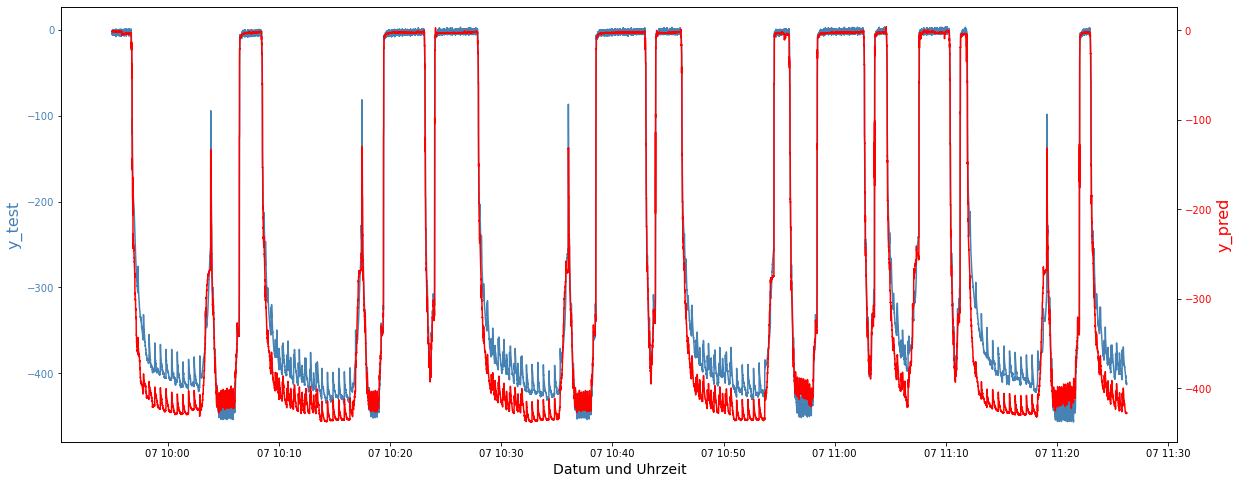

In [14]:
Daten_1 = result_21_09


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2021-09-07 09:55:00')&(Daten_1['CreateDateTime']<'2021-09-07 11:26:16')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test_21_09, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((0.5, 6))


ax2 = ax.twinx()
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_21_09, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
# plt.ylim((0.5, 6))


In [13]:
# 评估
print('The RMSE of the predicted result is:')#预估结果的RMSE为
print(mean_squared_error(result_21_09['y_test_21_09'], y_pred_21_09) ** 0.5)
print('The MAE of the predicted result is:')#预估结果的MAE为
print(mean_absolute_error(result_21_09['y_test_21_09'], y_pred_21_09))

The RMSE of the predicted result is:
22.931304659539286
The MAE of the predicted result is:
15.984836358030208


In [2]:
# # 保存模型
# print('Save model...')#保存模型
# # 保存模型到文件中
# gbm.save_model('model.txt')

# lgb.Booster加载模型
print('加载模型用于预测')
bst = lgb.Booster(model_file=r'C:\Users\XYC/model.txt')

加载模型用于预测


In [3]:
TREE_4 = pd.DataFrame()
TREE_4 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\LGBM-test-2021-2.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [4]:
columns = [col for col in TREE_4.columns if col not in ['CreateDateTime','timestamp', '51_Foerderdruck']]
columns

['85_Eckventil_ABS-8.1',
 '45_Laufmeldung-Vibrationssieb_BB-8.1',
 '13_Vollmelder_ABS-8.1',
 '70_Hertz-Schleuse_ABS-8.1',
 '72_Hertz-Schleuse_BB-8.1',
 '133-138_Filterabreinigung_ABS-8.1',
 '139-140_Turbokonus Eckventile_ABS-8.1',
 '86_Eckventil_ABS-8.2',
 '48_Laufmeldung-Vibrationssieb_ABS-8.2',
 '17_Vollmelder_ABS-8.2',
 '71_Hertz-Schleuse_ABS-8.2',
 '73_Hertz-Schleuse_BB-8.2',
 '141-146_Filterabreinigung_ABS-8.2',
 '147-148_Turbokonus-Eckventile_ABS-8.2',
 'CreateDateTime_Differenz',
 'deltatime_85_0',
 'deltatime_85_1',
 'deltatime_45_0',
 'deltatime_86_0',
 'deltatime_86_1',
 'deltatime_48_0',
 'deltatime_133_bis_138_0',
 'deltatime_141_bis_146_0',
 'deltatime_139_bis_140_0',
 'deltatime_147_bis_148_0']

In [5]:
X_test_21_01 = pd.DataFrame()
X_test_21_01 = TREE_4.drop('timestamp',axis = 1)
X_test_21_01 = X_test_21_01.drop('CreateDateTime',axis = 1)
X_test_21_01 = X_test_21_01.drop('51_Foerderdruck',axis = 1)
X_test_21_01

,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,48_Laufmeldung-Vibrationssieb_ABS-8.2,17_Vollmelder_ABS-8.2,...,deltatime_85_0,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0
0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,108.065,802.066,1560.983,108.065,64.897,0.000,16.615,0.627,345.868,160.896
1,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,108.270,801.861,1561.188,108.270,64.692,0.205,16.820,0.832,346.073,161.101
2,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,108.470,801.661,1561.388,108.470,64.492,0.405,17.020,1.032,346.273,161.301
3,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,108.689,801.442,1561.607,108.689,64.273,0.624,17.239,1.251,346.492,161.520
4,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,109.100,801.031,1562.018,109.100,63.862,1.035,17.650,1.662,346.903,161.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11229912,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,0.0,0.0,...,68.931,266.107,1988.616,68.931,0.825,22828.252,22.908,8.795,18.821,83.456
11229913,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,0.0,0.0,...,69.136,265.902,1988.821,69.136,0.620,22828.457,23.113,9.000,19.026,83.661
11229914,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,0.0,0.0,...,69.344,265.694,1989.029,69.344,0.412,22828.665,23.321,9.208,19.234,83.869
11229915,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,0.0,0.0,...,69.555,265.483,1989.240,69.555,0.201,22828.876,23.532,9.419,19.445,84.080


In [6]:
# y_pred_21_09 = gbm.predict(X_test_21_09, num_iteration=gbm.best_iteration)
# 预测
y_pred_21_01 = bst.predict(X_test_21_01)

In [7]:
TREE_4

,CreateDateTime,51_Foerderdruck,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,...,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,timestamp
0,2021-01-15 16:25:03.341,-403.356410,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,...,802.066,1560.983,108.065,64.897,0.000,16.615,0.627,345.868,160.896,1610727903341
1,2021-01-15 16:25:03.546,-405.092590,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,...,801.861,1561.188,108.270,64.692,0.205,16.820,0.832,346.073,161.101,1610727903546
2,2021-01-15 16:25:03.746,-408.564790,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,...,801.661,1561.388,108.470,64.492,0.405,17.020,1.032,346.273,161.301,1610727903746
3,2021-01-15 16:25:03.965,-410.300900,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,...,801.442,1561.607,108.689,64.273,0.624,17.239,1.251,346.492,161.520,1610727903965
4,2021-01-15 16:25:04.376,-412.036990,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,...,801.031,1562.018,109.100,63.862,1.035,17.650,1.662,346.903,161.931,1610727904376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11229912,2021-02-28 23:49:54.590,-353.009190,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,...,266.107,1988.616,68.931,0.825,22828.252,22.908,8.795,18.821,83.456,1614556194590
11229913,2021-02-28 23:49:54.795,-353.587890,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,...,265.902,1988.821,69.136,0.620,22828.457,23.113,9.000,19.026,83.661,1614556194795
11229914,2021-02-28 23:49:55.003,-354.166600,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,...,265.694,1989.029,69.344,0.412,22828.665,23.321,9.208,19.234,83.869,1614556195003
11229915,2021-02-28 23:49:55.214,-355.902710,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,...,265.483,1989.240,69.555,0.201,22828.876,23.532,9.419,19.445,84.080,1614556195214


In [8]:
X_test_21_01['y_pred_21_01'] = y_pred_21_01
left_21_01 = X_test_21_01
right_21_01 = TREE_4['CreateDateTime']
result_21_01 = pd.merge(left_21_01, right_21_01, how='left', left_index=True, right_index=True)
result_21_01['y_test_21_01'] = TREE_4['51_Foerderdruck']
result_21_01

,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,48_Laufmeldung-Vibrationssieb_ABS-8.2,17_Vollmelder_ABS-8.2,...,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,y_pred_21_01,CreateDateTime,y_test_21_01
0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,108.065,64.897,0.000,16.615,0.627,345.868,160.896,-399.450080,2021-01-15 16:25:03.341,-403.356410
1,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,108.270,64.692,0.205,16.820,0.832,346.073,161.101,-401.161918,2021-01-15 16:25:03.546,-405.092590
2,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,108.470,64.492,0.405,17.020,1.032,346.273,161.301,-401.804036,2021-01-15 16:25:03.746,-408.564790
3,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,108.689,64.273,0.624,17.239,1.251,346.492,161.520,-403.515943,2021-01-15 16:25:03.965,-410.300900
4,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,109.100,63.862,1.035,17.650,1.662,346.903,161.931,-404.611583,2021-01-15 16:25:04.376,-412.036990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11229912,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,0.0,0.0,...,68.931,0.825,22828.252,22.908,8.795,18.821,83.456,-335.506144,2021-02-28 23:49:54.590,-353.009190
11229913,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,0.0,0.0,...,69.136,0.620,22828.457,23.113,9.000,19.026,83.661,-335.663927,2021-02-28 23:49:54.795,-353.587890
11229914,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,0.0,0.0,...,69.344,0.412,22828.665,23.321,9.208,19.234,83.869,-335.121013,2021-02-28 23:49:55.003,-354.166600
11229915,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,0.0,0.0,...,69.555,0.201,22828.876,23.532,9.419,19.445,84.080,-335.121013,2021-02-28 23:49:55.214,-355.902710


(-500.0, 20.0)

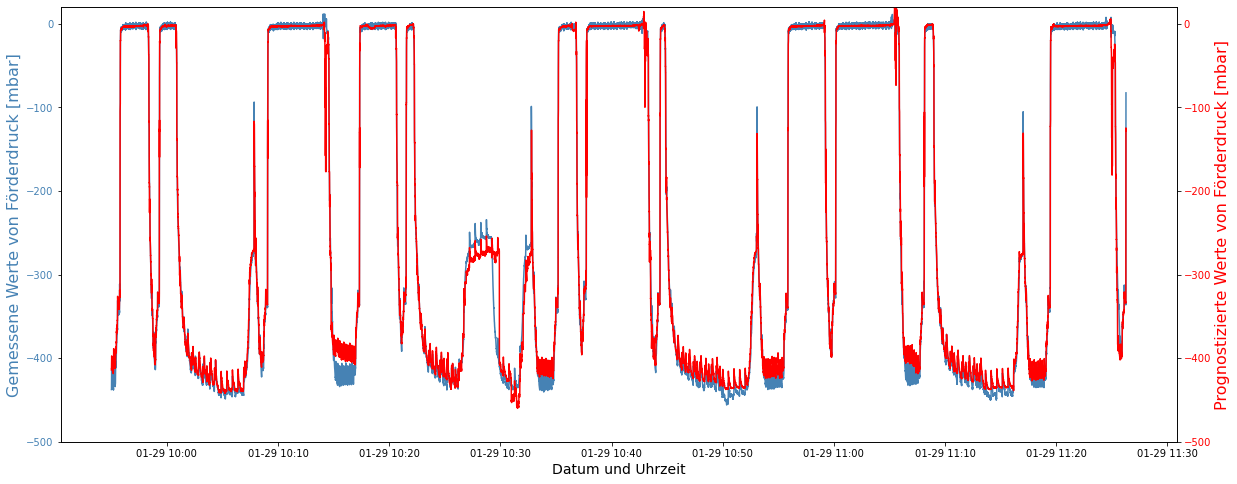

In [17]:
Daten_1 = result_21_01


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2021-01-29 09:55:00')&(Daten_1['CreateDateTime']<'2021-01-29 11:26:16')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'

plt.xticks(pd.date_range('2021-01-29','2021-01-30',freq='10T')) #横坐标日期范围及间隔

ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('Gemessene Werte von Förderdruck [mbar]', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test_21_01, color=col1)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%m-%d %H:%M'))  # 横坐标标签显示的日期格式
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((-500, 20))


ax2 = ax.twinx()
ax2.set_ylabel('Prognostizierte Werte von Förderdruck [mbar]', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_21_01, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-500, 20))


In [22]:
ID_45_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_045_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [23]:
ID_45_2021

,CreateDateTime,TagValue,TagId
0,2021-01-04 08:15:05.704,1.0,45
1,2021-01-04 08:19:02.541,0.0,45
2,2021-01-04 08:38:39.640,1.0,45
3,2021-01-04 08:41:39.508,0.0,45
4,2021-01-04 08:45:20.384,1.0,45
...,...,...,...
12881,2021-10-07 07:16:40.677,1.0,45
12882,2021-10-07 07:23:14.911,0.0,45
12883,2021-10-07 07:52:30.835,1.0,45
12884,2021-10-07 07:59:48.222,0.0,45


(0.0, 1.0)

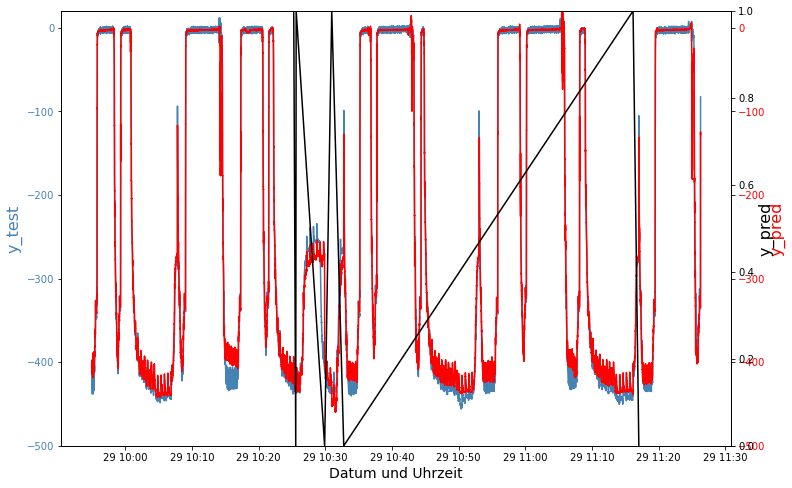

In [24]:
Daten_1 = result_21_01
Daten_2 = ID_45_2021

Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2021-01-29 09:55:00')&(Daten_1['CreateDateTime']<'2021-01-29 11:26:16')]
Daten_2 = Daten_2[(Daten_2['CreateDateTime']>'2021-01-29 09:55:00')&(Daten_2['CreateDateTime']<'2021-01-29 11:26:16')]


fig, ax = plt.subplots(figsize=(12, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test_21_01, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((-500, 20))


ax2 = ax.twinx()
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_21_01, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-500, 20))

ax3 = ax.twinx()
ax3.set_ylabel('y_pred', color=col3, fontsize=16)
ax3.plot(Daten_2.CreateDateTime, Daten_2.TagValue, color=col3)
ax3.tick_params(axis='y', labelcolor=col3)
plt.ylim((0, 1))

In [ ]:
Daten_1 = result_21_01
Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2021-01-29 09:55:00')&(Daten_1['CreateDateTime']<'2021-01-29 11:26:16')]


fig, ax = plt.subplots(figsize=(12, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('Gemessene Werte von Förderdruck [mbar]', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test_21_01, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((-500, 20))


ax2 = ax.twinx()
ax2.set_ylabel('Prognostizierte Werte von Förderdruck [mbar]', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_21_01, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-500, 20))


In [14]:
# 评估
print('The RMSE of the predicted result is:')#预估结果的RMSE为
print(mean_squared_error(result_21_01['y_test_21_01'], y_pred_21_01) ** 0.5)
print('The MAE of the predicted result is:')#预估结果的MAE为
print(mean_absolute_error(result_21_01['y_test_21_01'], y_pred_21_01))

The RMSE of the predicted result is:
17.63019556999533
The MAE of the predicted result is:
10.330018889711843


In [54]:
ID_51_2020_11 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/ID_51_2020_11.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [56]:
###目标变量
TREE_3 = pd.DataFrame()
TREE_4 = pd.DataFrame()
TREE_3 = ID_51_2020_11
TREE_3 = TREE_3.copy()
TREE_3.rename(columns = {'TagValue':'51_Foerderdruck'}, inplace=True)
TREE_3 = TREE_3.drop('TagId',axis = 1)


###特征合并函数
def zusammen(data,TREE_3):
    data = data[(data['CreateDateTime']>'2020-11-01 00:00:00')&(data['CreateDateTime']<'2020-12-31 23:59:59')]
    data = data.drop('TagId',axis = 1) 
    TREE_3 = TREE_3.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_3 = TREE_3.reset_index('CreateDateTime')
    return TREE_3

def zusammen_ohneTagId(data,TREE_3):
    data = data[(data['CreateDateTime']>'2020-11-01 00:00:00')&(data['CreateDateTime']<'2020-12-31 23:59:59')]
    TREE_3 = TREE_3.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_3 = TREE_3.reset_index('CreateDateTime')
    return TREE_3


###滤网特征处理
frames = [ID_133_2020.drop('TagId',axis = 1), ID_134_2020.drop('TagId',axis = 1), ID_135_2020.drop('TagId',axis = 1), ID_136_2020.drop('TagId',axis = 1), ID_137_2020.drop('TagId',axis = 1), ID_138_2020.drop('TagId',axis = 1)]
ID_133_bis_138_2020 = pd.concat(frames)
ID_133_bis_138_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_133_bis_138_2020 = ID_133_bis_138_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_133_bis_138_2020 = ID_133_bis_138_2020.reset_index()
ID_133_bis_138_2020 = ID_133_bis_138_2020.drop('index',axis = 1)

frames = [ID_141_2020.drop('TagId',axis = 1), ID_142_2020.drop('TagId',axis = 1), ID_143_2020.drop('TagId',axis = 1), ID_144_2020.drop('TagId',axis = 1), ID_145_2020.drop('TagId',axis = 1), ID_146_2020.drop('TagId',axis = 1)]
ID_141_bis_146_2020 = pd.concat(frames)
ID_141_bis_146_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_141_bis_146_2020 = ID_141_bis_146_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_141_bis_146_2020 = ID_141_bis_146_2020.reset_index()
ID_141_bis_146_2020 = ID_141_bis_146_2020.drop('index',axis = 1)


###Turbokonus 特征处理
frames = [ID_139_2020.drop('TagId',axis = 1), ID_140_2020.drop('TagId',axis = 1)]
ID_139_bis_140_2020 = pd.concat(frames)
ID_139_bis_140_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_139_bis_140_2020 = ID_139_bis_140_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_139_bis_140_2020 = ID_139_bis_140_2020.reset_index()
ID_139_bis_140_2020 = ID_139_bis_140_2020.drop('index',axis = 1)

frames = [ID_147_2020.drop('TagId',axis = 1), ID_148_2020.drop('TagId',axis = 1)]
ID_147_bis_148_2020 = pd.concat(frames)
ID_147_bis_148_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_147_bis_148_2020 = ID_147_bis_148_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_147_bis_148_2020 = ID_147_bis_148_2020.reset_index()
ID_147_bis_148_2020 = ID_147_bis_148_2020.drop('index',axis = 1)


###合并特征
TREE_3 = zusammen(ID_85_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'85_Eckventil_ABS-8.1'}, inplace=True)
TREE_3 = zusammen(ID_45_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'45_Laufmeldung-Vibrationssieb_BB-8.1'}, inplace=True)
TREE_3 = zusammen(ID_13_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'13_Vollmelder_ABS-8.1'}, inplace=True)
TREE_3 = zusammen(ID_70_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'70_Hertz-Schleuse_ABS-8.1'}, inplace=True)
TREE_3 = zusammen(ID_72_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'72_Hertz-Schleuse_BB-8.1'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_133_bis_138_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'133-138_Filterabreinigung_ABS-8.1'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_139_bis_140_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'139-140_Turbokonus Eckventile_ABS-8.1'}, inplace=True)

TREE_3 = zusammen(ID_86_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'86_Eckventil_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_48_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'48_Laufmeldung-Vibrationssieb_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_17_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'17_Vollmelder_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_71_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'71_Hertz-Schleuse_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_73_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'73_Hertz-Schleuse_BB-8.2'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_141_bis_146_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'141-146_Filterabreinigung_ABS-8.2'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_147_bis_148_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'147-148_Turbokonus-Eckventile_ABS-8.2'}, inplace=True)


TREE_3['85_Eckventil_ABS-8.1'] = TREE_3['85_Eckventil_ABS-8.1'].fillna(method = "ffill")
TREE_3['45_Laufmeldung-Vibrationssieb_BB-8.1'] = TREE_3['45_Laufmeldung-Vibrationssieb_BB-8.1'].fillna(method = "ffill")
TREE_3['13_Vollmelder_ABS-8.1'] = TREE_3['13_Vollmelder_ABS-8.1'].fillna(method = "ffill")
TREE_3['70_Hertz-Schleuse_ABS-8.1'] = TREE_3['70_Hertz-Schleuse_ABS-8.1'].fillna(method = "ffill")
TREE_3['72_Hertz-Schleuse_BB-8.1'] = TREE_3['72_Hertz-Schleuse_BB-8.1'].fillna(method = "ffill")
TREE_3['133-138_Filterabreinigung_ABS-8.1'] = TREE_3['133-138_Filterabreinigung_ABS-8.1'].fillna(method = "ffill")
TREE_3['139-140_Turbokonus Eckventile_ABS-8.1'] = TREE_3['139-140_Turbokonus Eckventile_ABS-8.1'].fillna(method = "ffill")
TREE_3['CreateDateTime_Differenz'] = TREE_3['CreateDateTime'].diff().dt.total_seconds()

TREE_3['86_Eckventil_ABS-8.2'] = TREE_3['86_Eckventil_ABS-8.2'].fillna(method = "ffill")
TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'] = TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'].fillna(0,limit=1)
TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'] = TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'].fillna(method = "ffill")
TREE_3['17_Vollmelder_ABS-8.2'] = TREE_3['17_Vollmelder_ABS-8.2'].fillna(method = "ffill")
TREE_3['71_Hertz-Schleuse_ABS-8.2'] = TREE_3['71_Hertz-Schleuse_ABS-8.2'].fillna(method = "ffill")
TREE_3['73_Hertz-Schleuse_BB-8.2'] = TREE_3['73_Hertz-Schleuse_BB-8.2'].fillna(method = "ffill")
TREE_3['141-146_Filterabreinigung_ABS-8.2'] = TREE_3['141-146_Filterabreinigung_ABS-8.2'].fillna(method = "ffill")
TREE_3['147-148_Turbokonus-Eckventile_ABS-8.2'] = TREE_3['147-148_Turbokonus-Eckventile_ABS-8.2'].fillna(method = "ffill")


###对过长停机时间做判断
TREE_3.loc[TREE_3['CreateDateTime_Differenz'] > 3600]

def NaNjgtc(data):
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'133-138_Filterabreinigung_ABS-8.1'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'141-146_Filterabreinigung_ABS-8.2'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data['timestamp'] = data['CreateDateTime'].values.astype(np.int64) // 10 ** 6
    s = data.set_index('timestamp')['51_Foerderdruck'].interpolate(method='index',inpalce=True)
    data = pd.merge(left=data, right=s, on=['timestamp'])
    data['51_Foerderdruck_x'] = data['51_Foerderdruck_y']
    data = data.drop('51_Foerderdruck_y',axis=1)
    data = data.drop('timestamp',axis=1)
    data = data.copy()
    data.rename(columns = {'51_Foerderdruck_x':'51_Foerderdruck'}, inplace=True)
    return data

TREE_4 = NaNjgtc(TREE_3)


###构建新的延时特征
#长延时特征
gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_0'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_1'] = ID_85_2020['CreateDateTime']
gh['TagValue'] = ID_85_2020['TagValue']
gh['TagId'] = ID_85_2020['TagId']
er = pd.DataFrame()
er['CreateDateTime'] = ID_45_2020['CreateDateTime']
er['CreateDateTime_45_0'] = ID_45_2020['CreateDateTime']
er['TagValue'] = ID_45_2020['TagValue']
er['TagId'] = ID_45_2020['TagId']

TREE_4 = zusammen(gh,TREE_4)
TREE_4['CreateDateTime_85_0'] = TREE_4['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_4['CreateDateTime_85_1'] = TREE_4['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_4['deltatime_85_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_85_0'] 
TREE_4['deltatime_85_0'] = TREE_4['deltatime_85_0'].dt.total_seconds()
TREE_4['deltatime_85_1'] = TREE_4['CreateDateTime_85_1'] - TREE_4['CreateDateTime'] 
TREE_4['deltatime_85_1'] = TREE_4['deltatime_85_1'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_85_0',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_85_1',axis = 1)
TREE_4 = zusammen(er,TREE_4)
TREE_4['CreateDateTime_45_0'] = TREE_4['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_4['deltatime_45_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_45_0'] 
TREE_4['deltatime_45_0'] = TREE_4['deltatime_45_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_45_0',axis = 1)

gh1 = pd.DataFrame()
gh1['CreateDateTime'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_0'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_1'] = ID_86_2020['CreateDateTime']
gh1['TagValue'] = ID_86_2020['TagValue']
gh1['TagId'] = ID_86_2020['TagId']
er1 = pd.DataFrame()
er1['CreateDateTime'] = ID_48_2020['CreateDateTime']
er1['CreateDateTime_48_0'] = ID_48_2020['CreateDateTime']
er1['TagValue'] = ID_48_2020['TagValue']
er1['TagId'] = ID_48_2020['TagId']

TREE_4 = zusammen(gh1,TREE_4)
# gh1 = gh1[(gh1['CreateDateTime']>'2021-08-16 09:13:00')&(gh1['CreateDateTime']<'2021-10-15 00:00:00')]
# gh1 = gh1.drop('TagId',axis = 1) 
# TREE_4 = TREE_4.set_index('CreateDateTime').join(gh1.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
# TREE_4 = TREE_4.reset_index('CreateDateTime')
TREE_4['CreateDateTime_86_0'] = TREE_4['CreateDateTime_86_0'].fillna(method = "ffill")
TREE_4['CreateDateTime_86_1'] = TREE_4['CreateDateTime_86_1'].fillna(method = "bfill")
TREE_4['deltatime_86_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_86_0'] 
TREE_4['deltatime_86_0'] = TREE_4['deltatime_86_0'].dt.total_seconds()
TREE_4['deltatime_86_1'] = TREE_4['CreateDateTime_86_1'] - TREE_4['CreateDateTime'] 
TREE_4['deltatime_86_1'] = TREE_4['deltatime_86_1'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_86_0',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_86_1',axis = 1)
TREE_4 = zusammen(er1,TREE_4)
# er1 = er1[(er1['CreateDateTime']>'2020-08-01 00:00:00')&(er1['CreateDateTime']<'2020-09-25 00:00:00')]
# er1 = er1.drop('TagId',axis = 1) 
# TREE_4 = TREE_4.set_index('CreateDateTime').join(er1.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
# TREE_4 = TREE_4.reset_index('CreateDateTime')
TREE_4['CreateDateTime_48_0'] = TREE_4['CreateDateTime_48_0'].fillna(method = "ffill")
TREE_4['deltatime_48_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_48_0'] 
TREE_4['deltatime_48_0'] = TREE_4['deltatime_48_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_48_0',axis = 1)

op = pd.DataFrame()
op['CreateDateTime'] = ID_133_bis_138_2020['CreateDateTime']
op['CreateDateTime_133_bis_138_0'] = ID_133_bis_138_2020['CreateDateTime']
op['TagValue'] = ID_133_bis_138_2020['TagValue']
op1 = pd.DataFrame()
op1['CreateDateTime'] = ID_141_bis_146_2020['CreateDateTime']
op1['CreateDateTime_141_bis_146_0'] = ID_141_bis_146_2020['CreateDateTime']
op1['TagValue'] = ID_141_bis_146_2020['TagValue']

TREE_4 = zusammen_ohneTagId(op,TREE_4)
TREE_4['CreateDateTime_133_bis_138_0'] = TREE_4['CreateDateTime_133_bis_138_0'].fillna(method = "ffill")
TREE_4['deltatime_133_bis_138_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_133_bis_138_0'] 
TREE_4['deltatime_133_bis_138_0'] = TREE_4['deltatime_133_bis_138_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_133_bis_138_0',axis = 1)
TREE_4 = zusammen_ohneTagId(op1,TREE_4)
TREE_4['CreateDateTime_141_bis_146_0'] = TREE_4['CreateDateTime_141_bis_146_0'].fillna(method = "ffill")
TREE_4['deltatime_141_bis_146_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_141_bis_146_0'] 
TREE_4['deltatime_141_bis_146_0'] = TREE_4['deltatime_141_bis_146_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_141_bis_146_0',axis = 1)

#传感器139-140正向计时，传感器147-148正向计时
nm = pd.DataFrame()
nm['CreateDateTime'] = ID_139_bis_140_2020['CreateDateTime']
nm['CreateDateTime_139_bis_140_0'] = ID_139_bis_140_2020['CreateDateTime']
nm['TagValue'] = ID_139_bis_140_2020['TagValue']
nm1 = pd.DataFrame()
nm1['CreateDateTime'] = ID_147_bis_148_2020['CreateDateTime']
nm1['CreateDateTime_147_bis_148_0'] = ID_147_bis_148_2020['CreateDateTime']
nm1['TagValue'] = ID_147_bis_148_2020['TagValue']

TREE_4 = zusammen_ohneTagId(nm,TREE_4)
TREE_4['CreateDateTime_139_bis_140_0'] = TREE_4['CreateDateTime_139_bis_140_0'].fillna(method = "ffill")
TREE_4['deltatime_139_bis_140_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_139_bis_140_0'] 
TREE_4['deltatime_139_bis_140_0'] = TREE_4['deltatime_139_bis_140_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_139_bis_140_0',axis = 1)
TREE_4 = zusammen_ohneTagId(nm1,TREE_4)
TREE_4['CreateDateTime_147_bis_148_0'] = TREE_4['CreateDateTime_147_bis_148_0'].fillna(method = "ffill")
TREE_4['deltatime_147_bis_148_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_147_bis_148_0'] 
TREE_4['deltatime_147_bis_148_0'] = TREE_4['deltatime_147_bis_148_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_147_bis_148_0',axis = 1)

#时间戳
TREE_4=TREE_4.copy()
TREE_4['timestamp'] = TREE_4['CreateDateTime'].values.astype(np.int64) // 10 ** 6 

In [57]:
TREE_4

,CreateDateTime,51_Foerderdruck,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,...,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,timestamp
0,2020-11-01 00:00:16.539,NaN,NaN,NaN,NaN,1.855469,NaN,NaN,1.0,NaN,...,48.812,NaN,NaN,758603.605,NaN,NaN,NaN,0.000,NaN,1604188816539
1,2020-11-01 00:00:16.549,NaN,NaN,NaN,NaN,1.855469,NaN,1.0,1.0,NaN,...,48.802,NaN,NaN,758603.595,NaN,0.000,NaN,0.010,NaN,1604188816549
2,2020-11-01 00:00:16.747,NaN,NaN,NaN,NaN,5.715942,NaN,1.0,1.0,NaN,...,48.604,NaN,NaN,758603.397,NaN,0.198,NaN,0.208,NaN,1604188816747
3,2020-11-01 00:00:16.759,NaN,NaN,NaN,NaN,5.715942,NaN,0.0,1.0,NaN,...,48.592,NaN,NaN,758603.385,NaN,0.000,NaN,0.220,NaN,1604188816759
4,2020-11-01 00:00:16.952,NaN,NaN,NaN,NaN,9.759521,NaN,0.0,1.0,NaN,...,48.399,NaN,NaN,758603.192,NaN,0.193,NaN,0.413,NaN,1604188816952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12005233,2020-12-26 22:30:06.554,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,685443.821,977687.173,NaN,977687.166,0.000,977687.174,117.208,977687.175,1609021806554
12005234,2020-12-26 22:30:36.559,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,...,NaN,685473.826,977717.178,NaN,977717.171,0.000,977717.179,147.213,977717.180,1609021836559
12005235,2020-12-26 22:30:36.963,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,685474.230,977717.582,NaN,977717.575,0.000,977717.583,147.617,977717.584,1609021836963
12005236,2020-12-26 22:31:06.957,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,...,NaN,685504.224,977747.576,NaN,977747.569,0.000,977747.577,177.611,977747.578,1609021866957


In [58]:
TREE_4.isnull().sum()

CreateDateTime                                 0
51_Foerderdruck                               37
85_Eckventil_ABS-8.1                          35
45_Laufmeldung-Vibrationssieb_BB-8.1        1000
13_Vollmelder_ABS-8.1                         36
70_Hertz-Schleuse_ABS-8.1                      0
72_Hertz-Schleuse_BB-8.1                     154
133-138_Filterabreinigung_ABS-8.1              1
139-140_Turbokonus Eckventile_ABS-8.1          0
86_Eckventil_ABS-8.2                     2127799
48_Laufmeldung-Vibrationssieb_ABS-8.2          0
17_Vollmelder_ABS-8.2                    2128527
71_Hertz-Schleuse_ABS-8.2                2127765
73_Hertz-Schleuse_BB-8.2                 2127927
141-146_Filterabreinigung_ABS-8.2        2127573
147-148_Turbokonus-Eckventile_ABS-8.2    2127766
CreateDateTime_Differenz                       1
deltatime_85_0                                35
deltatime_85_1                              1802
deltatime_45_0                              1000
deltatime_86_0      

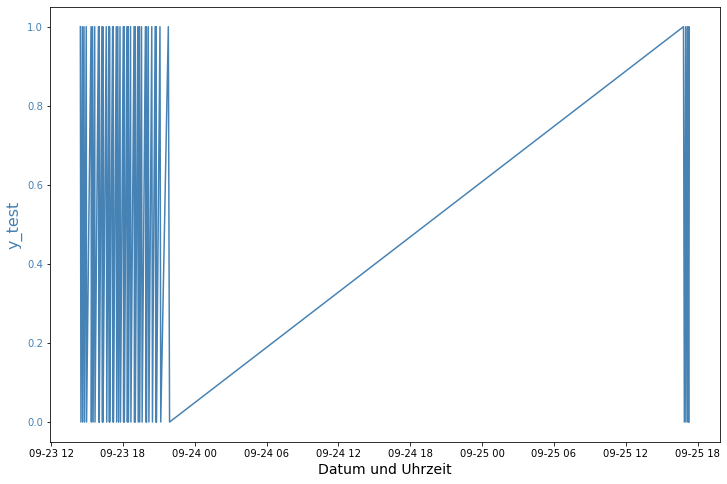

In [43]:
Daten_1 = ID_86_2020


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-09-23 09:55:00')&(Daten_1['CreateDateTime']<'2020-09-25 17:26:16')]


fig, ax = plt.subplots(figsize=(12, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)


In [ ]:
# TREE_4['TagValue_48'] = TREE_4['TagValue_48'].fillna(0)
# TREE_4['deltatime_48_0'] = TREE_4['deltatime_48_0'].fillna(0)
# TREE_4.isnull().sum()

In [59]:
TREE_4 = TREE_4.dropna()
TREE_4 = TREE_4.reset_index(drop=True)
TREE_4.isnull().sum()

CreateDateTime                           0
51_Foerderdruck                          0
85_Eckventil_ABS-8.1                     0
45_Laufmeldung-Vibrationssieb_BB-8.1     0
13_Vollmelder_ABS-8.1                    0
70_Hertz-Schleuse_ABS-8.1                0
72_Hertz-Schleuse_BB-8.1                 0
133-138_Filterabreinigung_ABS-8.1        0
139-140_Turbokonus Eckventile_ABS-8.1    0
86_Eckventil_ABS-8.2                     0
48_Laufmeldung-Vibrationssieb_ABS-8.2    0
17_Vollmelder_ABS-8.2                    0
71_Hertz-Schleuse_ABS-8.2                0
73_Hertz-Schleuse_BB-8.2                 0
141-146_Filterabreinigung_ABS-8.2        0
147-148_Turbokonus-Eckventile_ABS-8.2    0
CreateDateTime_Differenz                 0
deltatime_85_0                           0
deltatime_85_1                           0
deltatime_45_0                           0
deltatime_86_0                           0
deltatime_86_1                           0
deltatime_48_0                           0
deltatime_1

In [60]:
columns = [col for col in TREE_4.columns if col not in ['CreateDateTime','timestamp', '51_Foerderdruck']]
columns

['85_Eckventil_ABS-8.1',
 '45_Laufmeldung-Vibrationssieb_BB-8.1',
 '13_Vollmelder_ABS-8.1',
 '70_Hertz-Schleuse_ABS-8.1',
 '72_Hertz-Schleuse_BB-8.1',
 '133-138_Filterabreinigung_ABS-8.1',
 '139-140_Turbokonus Eckventile_ABS-8.1',
 '86_Eckventil_ABS-8.2',
 '48_Laufmeldung-Vibrationssieb_ABS-8.2',
 '17_Vollmelder_ABS-8.2',
 '71_Hertz-Schleuse_ABS-8.2',
 '73_Hertz-Schleuse_BB-8.2',
 '141-146_Filterabreinigung_ABS-8.2',
 '147-148_Turbokonus-Eckventile_ABS-8.2',
 'CreateDateTime_Differenz',
 'deltatime_85_0',
 'deltatime_85_1',
 'deltatime_45_0',
 'deltatime_86_0',
 'deltatime_86_1',
 'deltatime_48_0',
 'deltatime_133_bis_138_0',
 'deltatime_141_bis_146_0',
 'deltatime_139_bis_140_0',
 'deltatime_147_bis_148_0']

In [61]:
X_test_11 = TREE_4.drop('timestamp',axis = 1)
X_test_11 = X_test_11.drop('CreateDateTime',axis = 1)
X_test_11 = X_test_11.drop('51_Foerderdruck',axis = 1)
X_test_11

,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,48_Laufmeldung-Vibrationssieb_ABS-8.2,17_Vollmelder_ABS-8.2,...,deltatime_85_0,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,102.854,407.217,102.852,102.864,44.235,0.000,20.656,9.204,166.549,417.073
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,103.057,407.014,103.055,103.067,44.032,0.203,20.859,9.407,166.752,417.276
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,103.261,406.810,103.259,103.271,43.828,0.407,21.063,9.611,166.956,417.480
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,103.465,406.606,103.463,103.475,43.624,0.611,21.267,9.815,167.160,417.684
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,103.666,406.405,103.664,103.676,43.423,0.812,21.468,0.000,167.361,417.885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906385,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,280951.999,0.008,280799.063,999950.563,0.007,1010490.727,280712.378,998719.898,280702.106,1000523.092
5906386,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,280952.000,0.007,280799.064,999950.564,0.006,1010490.728,280712.379,998719.899,280702.107,1000523.093
5906387,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,280952.004,0.003,280799.068,999950.568,0.002,1010490.732,280712.383,0.000,280702.111,0.000
5906388,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,280952.005,0.002,280799.069,999950.569,0.001,1010490.733,280712.384,0.000,280702.112,0.001


In [62]:
# # 保存模型
# print('Save model...')#保存模型
# # 保存模型到文件中
# gbm.save_model('model.txt')

# lgb.Booster加载模型
print('加载模型用于预测')
bst = lgb.Booster(model_file=r'C:\Users\XYC/model.txt')

加载模型用于预测


In [63]:
# y_pred_09 = gbm.predict(X_test_09, num_iteration=gbm.best_iteration)
# 预测
y_pred_11 = bst.predict(X_test_11)

In [66]:
X_test_11['y_pred_11'] = y_pred_11
left_11 = X_test_11
right_11 = TREE_4['CreateDateTime']
result_11 = pd.merge(left_11, right_11, how='left', left_index=True, right_index=True)
result_11['y_test_11'] = TREE_4['51_Foerderdruck']
result_11

,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,48_Laufmeldung-Vibrationssieb_ABS-8.2,17_Vollmelder_ABS-8.2,...,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,y_pred_11,CreateDateTime,y_test_11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,102.864,44.235,0.000,20.656,9.204,166.549,417.073,-421.131183,2020-11-20 16:12:18.660,-444.732422
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,103.067,44.032,0.203,20.859,9.407,166.752,417.276,-421.276015,2020-11-20 16:12:18.863,-444.444490
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,103.271,43.828,0.407,21.063,9.611,166.956,417.480,-421.276015,2020-11-20 16:12:19.067,-446.180600
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,103.475,43.624,0.611,21.267,9.815,167.160,417.684,-421.276015,2020-11-20 16:12:19.271,-445.023190
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,103.676,43.423,0.812,21.468,0.000,167.361,417.885,-418.869615,2020-11-20 16:12:19.472,-445.596198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906385,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,999950.563,0.007,1010490.727,280712.378,998719.898,280702.106,1000523.092,-243.585518,2020-12-15 14:55:19.374,0.000000
5906386,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,999950.564,0.006,1010490.728,280712.379,998719.899,280702.107,1000523.093,-243.585518,2020-12-15 14:55:19.375,0.000000
5906387,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,999950.568,0.002,1010490.732,280712.383,0.000,280702.111,0.000,-206.637870,2020-12-15 14:55:19.379,0.000000
5906388,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,999950.569,0.001,1010490.733,280712.384,0.000,280702.112,0.001,-205.659612,2020-12-15 14:55:19.380,0.000000


(-500.0, 20.0)

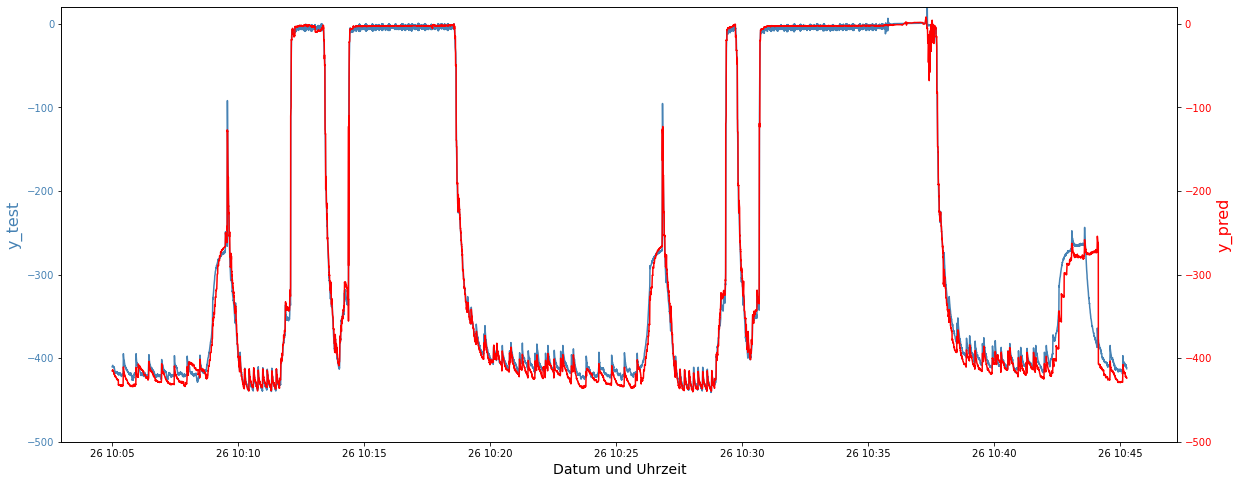

In [76]:
Daten_1 = result_11


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-11-26 10:05:00')&(Daten_1['CreateDateTime']<'2020-11-26 10:45:16')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test_11, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((-500, 20))


ax2 = ax.twinx()
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_11, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-500, 20))

In [71]:
# 评估
print('The RMSE of the predicted result is:')#预估结果的RMSE为
print(mean_squared_error(result_11['y_test_11'], y_pred_11) ** 0.5)
print('The MAE of the predicted result is:')#预估结果的MAE为
print(mean_absolute_error(result_11['y_test_11'], y_pred_11))

The RMSE of the predicted result is:
16.14990108372955
The MAE of the predicted result is:
9.42269697322965


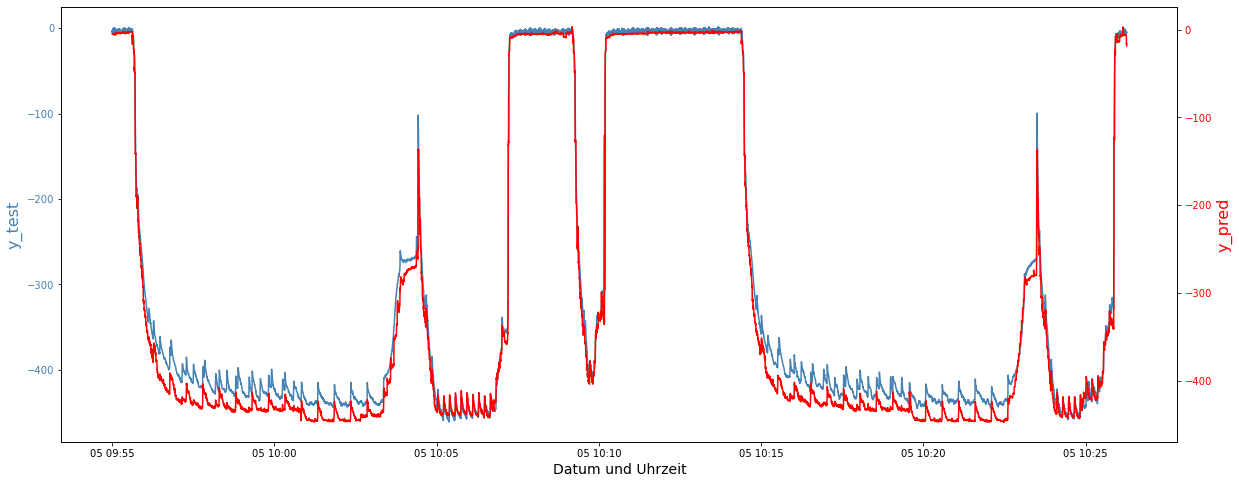

In [38]:
Daten_1 = result_09


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-09-05 09:55:00')&(Daten_1['CreateDateTime']<'2020-09-05 10:26:16')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test_09, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((0.5, 6))


ax2 = ax.twinx()
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_09, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
# plt.ylim((0.5, 6))


In [37]:
# 评估
print('The RMSE of the predicted result is:')#预估结果的RMSE为
print(mean_squared_error(result_09['y_test_09'], y_pred_09) ** 0.5)
print('The MAE of the predicted result is:')#预估结果的MAE为
print(mean_absolute_error(result_09['y_test_09'], y_pred_09))

The RMSE of the predicted result is:
17.6410917463238
The MAE of the predicted result is:
10.267412430597592


In [6]:
###目标变量
TREE_1 = pd.DataFrame()
TREE_1 = ID_51_2020[(ID_51_2020['CreateDateTime']>'2020-02-01 00:00:00')&(ID_51_2020['CreateDateTime']<'2020-04-15 00:00:00')]
TREE_1 = TREE_1.copy()
TREE_1.rename(columns = {'TagValue':'TagValue_51'}, inplace=True)


###特征合并函数
def zusammen(data,TREE_1):
    data = data[(data['CreateDateTime']>'2020-02-01 00:00:00')&(data['CreateDateTime']<'2020-07-15 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_1 = TREE_1.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_1 = TREE_1.reset_index('CreateDateTime')
    return TREE_1


###滤网特征处理
frames = [ID_133_2020.drop('TagId',axis = 1), ID_134_2020.drop('TagId',axis = 1), ID_135_2020.drop('TagId',axis = 1), ID_136_2020.drop('TagId',axis = 1), ID_137_2020.drop('TagId',axis = 1), ID_138_2020.drop('TagId',axis = 1)]
ID_133_bis_138_2020 = pd.concat(frames)
ID_133_bis_138_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_133_bis_138_2020 = ID_133_bis_138_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_133_bis_138_2020 = ID_133_bis_138_2020.reset_index()
ID_133_bis_138_2020 = ID_133_bis_138_2020.drop('index',axis = 1)

frames = [ID_141_2020.drop('TagId',axis = 1), ID_142_2020.drop('TagId',axis = 1), ID_143_2020.drop('TagId',axis = 1), ID_144_2020.drop('TagId',axis = 1), ID_145_2020.drop('TagId',axis = 1), ID_146_2020.drop('TagId',axis = 1)]
ID_141_bis_142_2020 = pd.concat(frames)
ID_141_bis_142_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_141_bis_142_2020 = ID_141_bis_142_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_141_bis_142_2020 = ID_141_bis_142_2020.reset_index()
ID_141_bis_142_2020 = ID_141_bis_142_2020.drop('index',axis = 1)


###合并特征
TREE_1 = zusammen(ID_85_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_1 = zusammen(ID_45_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_45'}, inplace=True)
TREE_1 = zusammen(ID_13_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_13'}, inplace=True)
TREE_1 = zusammen(ID_70_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_70'}, inplace=True)
TREE_1 = zusammen(ID_72_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_72'}, inplace=True)
TREE_1 = zusammen(ID_133_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_133'}, inplace=True)
TREE_1 = zusammen(ID_134_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_134'}, inplace=True)
TREE_1 = zusammen(ID_135_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_135'}, inplace=True)
TREE_1 = zusammen(ID_136_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_136'}, inplace=True)
TREE_1 = zusammen(ID_137_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_137'}, inplace=True)
TREE_1 = zusammen(ID_138_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_138'}, inplace=True)
TREE_1 = zusammen(ID_139_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_139'}, inplace=True)
TREE_1 = zusammen(ID_140_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_140'}, inplace=True)

TREE_1 = zusammen(ID_86_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_86'}, inplace=True)
TREE_1 = zusammen(ID_48_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_48'}, inplace=True)
TREE_1 = zusammen(ID_17_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_17'}, inplace=True)
TREE_1 = zusammen(ID_71_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_71'}, inplace=True)
TREE_1 = zusammen(ID_73_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_73'}, inplace=True)
TREE_1 = zusammen(ID_141_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_141'}, inplace=True)
TREE_1 = zusammen(ID_142_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_142'}, inplace=True)
TREE_1 = zusammen(ID_143_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_143'}, inplace=True)
TREE_1 = zusammen(ID_144_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_144'}, inplace=True)
TREE_1 = zusammen(ID_145_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_145'}, inplace=True)
TREE_1 = zusammen(ID_146_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_146'}, inplace=True)
TREE_1 = zusammen(ID_147_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_147'}, inplace=True)
TREE_1 = zusammen(ID_148_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_148'}, inplace=True)


TREE_1['TagValue_85'] = TREE_1['TagValue_85'].fillna(method = "ffill")
TREE_1['TagValue_45'] = TREE_1['TagValue_45'].fillna(method = "ffill")
TREE_1['TagValue_13'] = TREE_1['TagValue_13'].fillna(method = "ffill")
TREE_1['TagValue_70'] = TREE_1['TagValue_70'].fillna(method = "ffill")
TREE_1['TagValue_72'] = TREE_1['TagValue_72'].fillna(method = "ffill")
TREE_1['TagValue_133'] = TREE_1['TagValue_133'].fillna(method = "ffill")
TREE_1['TagValue_134'] = TREE_1['TagValue_134'].fillna(method = "ffill")
TREE_1['TagValue_135'] = TREE_1['TagValue_135'].fillna(method = "ffill")
TREE_1['TagValue_136'] = TREE_1['TagValue_136'].fillna(method = "ffill")
TREE_1['TagValue_137'] = TREE_1['TagValue_137'].fillna(method = "ffill")
TREE_1['TagValue_138'] = TREE_1['TagValue_138'].fillna(method = "ffill")
TREE_1['TagValue_139'] = TREE_1['TagValue_139'].fillna(method = "ffill")
TREE_1['TagValue_140'] = TREE_1['TagValue_140'].fillna(method = "ffill")
TREE_1['diff_float'] = TREE_1['CreateDateTime'].diff().dt.total_seconds()

TREE_1['TagValue_86'] = TREE_1['TagValue_86'].fillna(method = "ffill")
TREE_1['TagValue_48'] = TREE_1['TagValue_48'].fillna(method = "ffill")
TREE_1['TagValue_17'] = TREE_1['TagValue_17'].fillna(method = "ffill")
TREE_1['TagValue_71'] = TREE_1['TagValue_71'].fillna(method = "ffill")
TREE_1['TagValue_73'] = TREE_1['TagValue_73'].fillna(method = "ffill")
TREE_1['TagValue_141'] = TREE_1['TagValue_141'].fillna(method = "ffill")
TREE_1['TagValue_142'] = TREE_1['TagValue_142'].fillna(method = "ffill")
TREE_1['TagValue_143'] = TREE_1['TagValue_143'].fillna(method = "ffill")
TREE_1['TagValue_144'] = TREE_1['TagValue_144'].fillna(method = "ffill")
TREE_1['TagValue_145'] = TREE_1['TagValue_145'].fillna(method = "ffill")
TREE_1['TagValue_146'] = TREE_1['TagValue_146'].fillna(method = "ffill")
TREE_1['TagValue_147'] = TREE_1['TagValue_147'].fillna(method = "ffill")
TREE_1['TagValue_148'] = TREE_1['TagValue_148'].fillna(method = "ffill")
TREE_1 = TREE_1.drop('TagId',axis = 1)


###对过长停机时间做判断
TREE_1.loc[TREE_1['diff_float'] > 3600]

def NaNjgtc(data):
    data.loc[(data['diff_float'] > 3600),'TagValue_51'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_133'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_134'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_135'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_136'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_137'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_138'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_141'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_142'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_143'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_144'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_145'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_146'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data['timestamp'] = data['CreateDateTime'].values.astype(np.int64) // 10 ** 6
    s = data.set_index('timestamp')['TagValue_51'].interpolate(method='index',inpalce=True)
    data = pd.merge(left=data, right=s, on=['timestamp'])
    data['TagValue_51_x'] = data['TagValue_51_y']
    data = data.drop('TagValue_51_y',axis=1)
    data = data.drop('timestamp',axis=1)
    data = data.copy()
    data.rename(columns = {'TagValue_51_x':'TagValue_51'}, inplace=True)
    return data

TREE_2 = NaNjgtc(TREE_1)


###构建新的延时特征
#短延时特征
TREE_2['TagValue_51'] = TREE_2['TagValue_51'].fillna(method = "ffill")
TREE_2['TagValue_133_lag1'] = TREE_2['TagValue_133'].shift(1)
TREE_2['TagValue_133_lag2'] = TREE_2['TagValue_133'].shift(2)
TREE_2['TagValue_134_lag1'] = TREE_2['TagValue_134'].shift(1)
TREE_2['TagValue_134_lag2'] = TREE_2['TagValue_134'].shift(2)
TREE_2['TagValue_135_lag1'] = TREE_2['TagValue_135'].shift(1)
TREE_2['TagValue_135_lag2'] = TREE_2['TagValue_135'].shift(2)
TREE_2['TagValue_136_lag1'] = TREE_2['TagValue_136'].shift(1)
TREE_2['TagValue_136_lag2'] = TREE_2['TagValue_136'].shift(2)
TREE_2['TagValue_137_lag1'] = TREE_2['TagValue_137'].shift(1)
TREE_2['TagValue_137_lag2'] = TREE_2['TagValue_137'].shift(2)
TREE_2['TagValue_138_lag1'] = TREE_2['TagValue_138'].shift(1)
TREE_2['TagValue_138_lag2'] = TREE_2['TagValue_138'].shift(2)
TREE_2['TagValue_141_lag1'] = TREE_2['TagValue_141'].shift(1)
TREE_2['TagValue_141_lag2'] = TREE_2['TagValue_141'].shift(2)
TREE_2['TagValue_142_lag1'] = TREE_2['TagValue_142'].shift(1)
TREE_2['TagValue_142_lag2'] = TREE_2['TagValue_142'].shift(2)
TREE_2['TagValue_143_lag1'] = TREE_2['TagValue_143'].shift(1)
TREE_2['TagValue_143_lag2'] = TREE_2['TagValue_143'].shift(2)
TREE_2['TagValue_144_lag1'] = TREE_2['TagValue_144'].shift(1)
TREE_2['TagValue_144_lag2'] = TREE_2['TagValue_144'].shift(2)
TREE_2['TagValue_145_lag1'] = TREE_2['TagValue_145'].shift(1)
TREE_2['TagValue_145_lag2'] = TREE_2['TagValue_145'].shift(2)
TREE_2['TagValue_146_lag1'] = TREE_2['TagValue_146'].shift(1)
TREE_2['TagValue_146_lag2'] = TREE_2['TagValue_146'].shift(2)


#长延时特征
gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_0'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_1'] = ID_85_2020['CreateDateTime']
gh['TagValue'] = ID_85_2020['TagValue']
gh['TagId'] = ID_85_2020['TagId']
er = pd.DataFrame()
er['CreateDateTime'] = ID_45_2020['CreateDateTime']
er['CreateDateTime_45_0'] = ID_45_2020['CreateDateTime']
er['TagValue'] = ID_45_2020['TagValue']
er['TagId'] = ID_45_2020['TagId']

TREE_2 = zusammen(gh,TREE_2)
TREE_2['CreateDateTime_85_0'] = TREE_2['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_85_1'] = TREE_2['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_2['deltatime_85_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_85_0'] 
TREE_2['deltatime_85_0'] = TREE_2['deltatime_85_0'].dt.total_seconds()
TREE_2['deltatime_85_1'] = TREE_2['CreateDateTime_85_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_85_1'] = TREE_2['deltatime_85_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_1',axis = 1)
TREE_2 = zusammen(er,TREE_2)
TREE_2['CreateDateTime_45_0'] = TREE_2['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_2['deltatime_45_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_45_0'] 
TREE_2['deltatime_45_0'] = TREE_2['deltatime_45_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_45_0',axis = 1)


gh1 = pd.DataFrame()
gh1['CreateDateTime'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_0'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_1'] = ID_86_2020['CreateDateTime']
gh1['TagValue'] = ID_86_2020['TagValue']
gh1['TagId'] = ID_86_2020['TagId']
er1 = pd.DataFrame()
er1['CreateDateTime'] = ID_48_2020['CreateDateTime']
er1['CreateDateTime_48_0'] = ID_48_2020['CreateDateTime']
er1['TagValue'] = ID_48_2020['TagValue']
er1['TagId'] = ID_48_2020['TagId']

TREE_2 = zusammen(gh1,TREE_2)
TREE_2['CreateDateTime_86_0'] = TREE_2['CreateDateTime_86_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_86_1'] = TREE_2['CreateDateTime_86_1'].fillna(method = "bfill")
TREE_2['deltatime_86_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_86_0'] 
TREE_2['deltatime_86_0'] = TREE_2['deltatime_86_0'].dt.total_seconds()
TREE_2['deltatime_86_1'] = TREE_2['CreateDateTime_86_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_86_1'] = TREE_2['deltatime_86_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_86_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_86_1',axis = 1)
TREE_2 = zusammen(er1,TREE_2)
TREE_2['CreateDateTime_48_0'] = TREE_2['CreateDateTime_48_0'].fillna(method = "ffill")
TREE_2['deltatime_48_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_48_0'] 
TREE_2['deltatime_48_0'] = TREE_2['deltatime_48_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_48_0',axis = 1)
TREE_2=TREE_2.copy()
TREE_2['timestamp'] = TREE_2['CreateDateTime'].values.astype(np.int64) // 10 ** 6 

KeyboardInterrupt: 

In [ ]:
TREE_2.isnull().sum()

In [ ]:
# TREE_2['TagValue_48'] = TREE_2['TagValue_48'].fillna(0)
# TREE_2['deltatime_48_0'] = TREE_2['deltatime_48_0'].fillna(0)
# TREE_2['deltatime_86_1'] = TREE_2['deltatime_86_1'].fillna(0)
# TREE_2.isnull().sum()

In [ ]:
TREE_2 = TREE_2.dropna()
TREE_2

In [ ]:
# TREE_2=TREE_2.copy()
# TREE_2['deltatime_85_0'].loc[TREE_2["TagValue_85"]== 0] = 0
# TREE_2['deltatime_85_1'].loc[TREE_2["TagValue_85"]== 0] = 0
# TREE_2['deltatime_45_0'].loc[TREE_2["TagValue_45"]== 0] = 0
# TREE_2['deltatime_86_0'].loc[TREE_2["TagValue_86"]== 0] = 0
# TREE_2['deltatime_86_1'].loc[TREE_2["TagValue_86"]== 0] = 0
# TREE_2['deltatime_48_0'].loc[TREE_2["TagValue_48"]== 0] = 0


In [ ]:
# b = TREE_2.groupby('TagValue_85').get_group(1)
# b

In [ ]:
TREE_2 = TREE_2.reset_index(drop=True)
TREE_2.isnull().sum()

In [ ]:
TREE_2.to_csv(r'D:\留德十年\TUD\ADP\Data\LGBM-train-2020.csv')

In [2]:
TREE_2 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\LGBM-train-2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [ ]:
TREE_2

In [3]:
columns = [col for col in TREE_2.columns if col not in ['CreateDateTime','timestamp', 'TagValue_51']]
columns

['TagValue_85',
 'TagValue_45',
 'TagValue_13',
 'TagValue_70',
 'TagValue_72',
 'TagValue_133',
 'TagValue_134',
 'TagValue_135',
 'TagValue_136',
 'TagValue_137',
 'TagValue_138',
 'TagValue_139',
 'TagValue_140',
 'TagValue_86',
 'TagValue_48',
 'TagValue_17',
 'TagValue_71',
 'TagValue_73',
 'TagValue_141',
 'TagValue_142',
 'TagValue_143',
 'TagValue_144',
 'TagValue_145',
 'TagValue_146',
 'TagValue_147',
 'TagValue_148',
 'diff_float',
 'TagValue_133_lag1',
 'TagValue_133_lag2',
 'TagValue_134_lag1',
 'TagValue_134_lag2',
 'TagValue_135_lag1',
 'TagValue_135_lag2',
 'TagValue_136_lag1',
 'TagValue_136_lag2',
 'TagValue_137_lag1',
 'TagValue_137_lag2',
 'TagValue_138_lag1',
 'TagValue_138_lag2',
 'TagValue_141_lag1',
 'TagValue_141_lag2',
 'TagValue_142_lag1',
 'TagValue_142_lag2',
 'TagValue_143_lag1',
 'TagValue_143_lag2',
 'TagValue_144_lag1',
 'TagValue_144_lag2',
 'TagValue_145_lag1',
 'TagValue_145_lag2',
 'TagValue_146_lag1',
 'TagValue_146_lag2',
 'deltatime_85_0',
 'delt

In [4]:
X = TREE_2[columns]
y = TREE_2['TagValue_51']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [1]:
from pathlib import Path

import pandas as pd

import lightgbm as lgb

if lgb.compat.MATPLOTLIB_INSTALLED:
    import matplotlib.pyplot as plt
else:
    raise ImportError('You need to install matplotlib and restart your session for plot_example.py.')

print('Loading data...')
X = TREE_2[columns]
y = TREE_2['TagValue_51']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse', 'auc'},
    'max_depth': 10,
    'num_leaves': 100,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

print('Starting training...')
# train
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=250,
    valid_sets=[lgb_train, lgb_test],
    feature_name=[f'f{i + 1}' for i in range(X_train.shape[-1])],
    callbacks=[
        lgb.record_evaluation(evals_result)
    ]
)

print('Plotting metrics recorded during training...')#画出训练结果
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()

print('Plotting feature importances...')#画特征重要性排序
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

# print('Plotting split value histogram...')
# ax = lgb.plot_split_value_histogram(gbm, feature='f24', bins='auto')
# plt.show()

print('Plotting 4th tree...')  # 画出决策树，其中的第4颗
ax = lgb.plot_tree(gbm, tree_index=3, figsize=(15, 15), show_info=['split_gain'])
plt.show()

print('Plotting 4th tree with graphviz...')#导出决策树的pdf图像到本地
graph = lgb.create_tree_digraph(gbm, tree_index=3, name='Tree4')
graph.render(view=True)


# 保存模型
print('Save model...')#保存模型
# 保存模型到文件中
gbm.save_model('model.txt')

print('Start prediction...')#开始预测
# 预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# 评估
print('The rmse of the predicted result is:')#预估结果的rmse为
print(mean_squared_error(y_test, y_pred) ** 0.5)

KeyboardInterrupt: 

Plotting 4th tree...


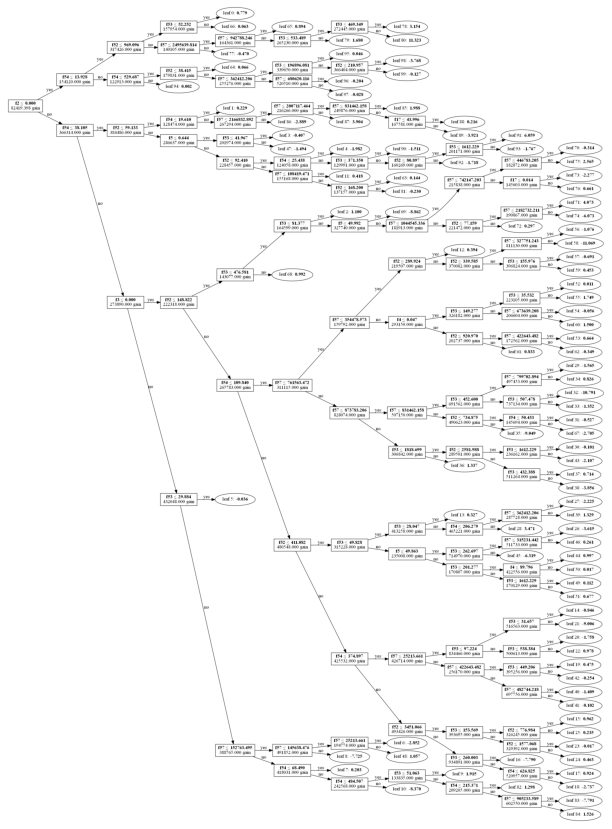

In [14]:
print('Plotting 93th tree...')  # 画出决策树，其中的第4颗
ax = lgb.plot_tree(gbm, tree_index=93, figsize=(15, 15), show_info=['split_gain'])
plt.show()

In [6]:
X_test['y_pred'] = y_pred
right = TREE_2['CreateDateTime']
left = X_test
result = pd.merge(left, right, how='left', left_index=True, right_index=True)
result['y_test'] = y_test
result = result.sort_values(by=['CreateDateTime'])
result

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,...,TagValue_146_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,y_pred,CreateDateTime,y_test
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.043,30.611,1.043,1.043,369344.662,1.043,-89.355008,2020-02-06 13:05:58.025,-2.314819
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.474,29.180,2.474,2.474,369343.231,2.474,-3.234813,2020-02-06 13:05:59.456,-4.050903
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.885,28.769,2.885,2.885,369342.820,2.885,-3.234813,2020-02-06 13:05:59.867,-2.893555
10,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.091,28.563,3.091,3.091,369342.614,3.091,-3.234813,2020-02-06 13:06:00.073,-5.208374
18,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.734,26.920,4.734,4.734,369340.971,4.734,-11.329990,2020-02-06 13:06:01.716,-5.208374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559556,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,852.167,116.562,886745.720,47.131,116.561,209817.363,-427.247295,2020-07-04 21:16:52.162,-404.072309
13559558,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,852.201,116.528,886745.754,47.165,116.527,209817.397,-420.527792,2020-07-04 21:16:52.196,-404.513890
13559571,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,909.233,59.496,886802.786,104.197,59.495,209874.429,-439.180187,2020-07-04 21:17:49.228,-435.763890
13559572,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,913.692,55.037,886807.245,108.656,55.036,209878.888,-437.438552,2020-07-04 21:17:53.687,-448.495390


(-500.0, 20.0)

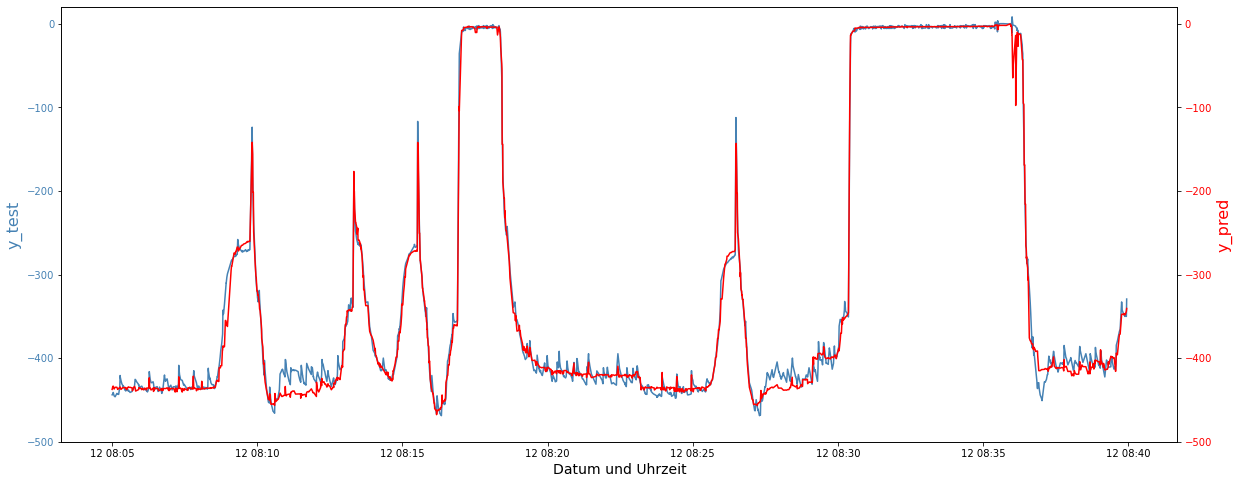

In [7]:
Daten_1 = result


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-02-12 08:05:00')&(Daten_1['CreateDateTime']<'2020-02-12 08:40:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((-500, 20))


ax2 = ax.twinx()
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-500, 20))

(-500.0, 20.0)

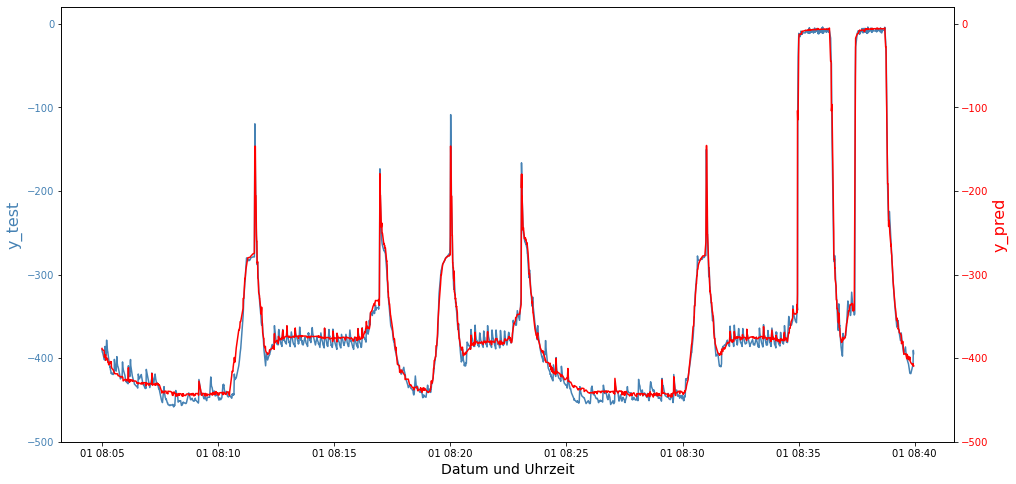

In [9]:
Daten_1 = result


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-04-01 08:05:00')&(Daten_1['CreateDateTime']<'2020-04-01 08:40:00')]


fig, ax = plt.subplots(figsize=(16, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((-500, 20))


ax2 = ax.twinx()
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-500, 20))

(-500.0, 20.0)

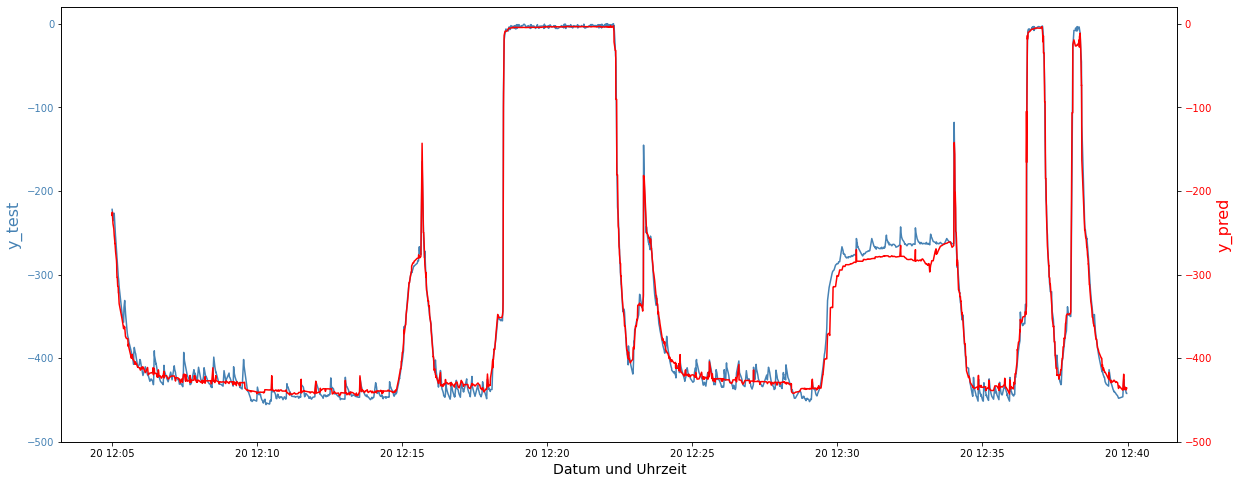

In [21]:
Daten_1 = result


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-02-20 12:05:00')&(Daten_1['CreateDateTime']<'2020-02-20 12:40:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((-500, 20))


ax2 = ax.twinx()
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-500, 20))

(-500.0, 20.0)

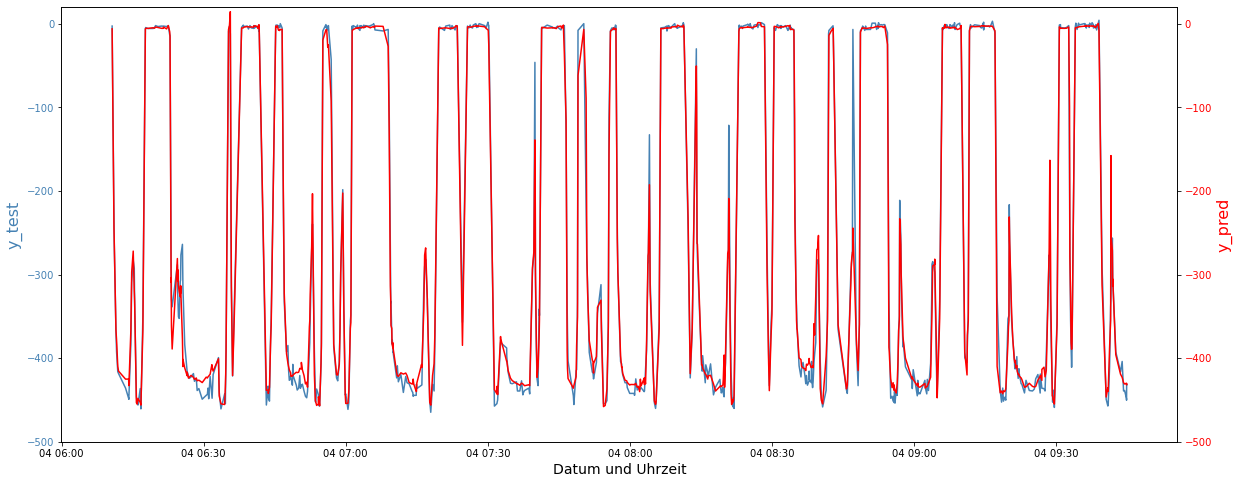

In [25]:
Daten_1 = result


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-07-04 06:10:37')&(Daten_1['CreateDateTime']<'2020-07-04 09:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((-500, 20))


ax2 = ax.twinx()
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-500, 20))

In [ ]:
#预测9月份

In [103]:
ID_51_2020_09 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/ID_51_2020_09.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [130]:
ID_51_2020_09

,CreateDateTime,TagValue,TagId
20873619,2020-09-05 00:43:29.922,-0.578735,51
20873620,2020-09-05 00:43:30.741,0.000000,51
20873621,2020-09-05 00:43:30.947,-0.578735,51
20873622,2020-09-05 00:43:31.353,2.893433,51
20873623,2020-09-05 00:43:31.561,4.629639,51
...,...,...,...
22711684,2020-09-23 21:58:55.409,0.000000,51
22711685,2020-09-23 21:58:56.234,-0.578735,51
22711686,2020-09-23 21:58:56.439,0.000000,51
22711687,2020-09-23 21:58:56.650,-0.578735,51


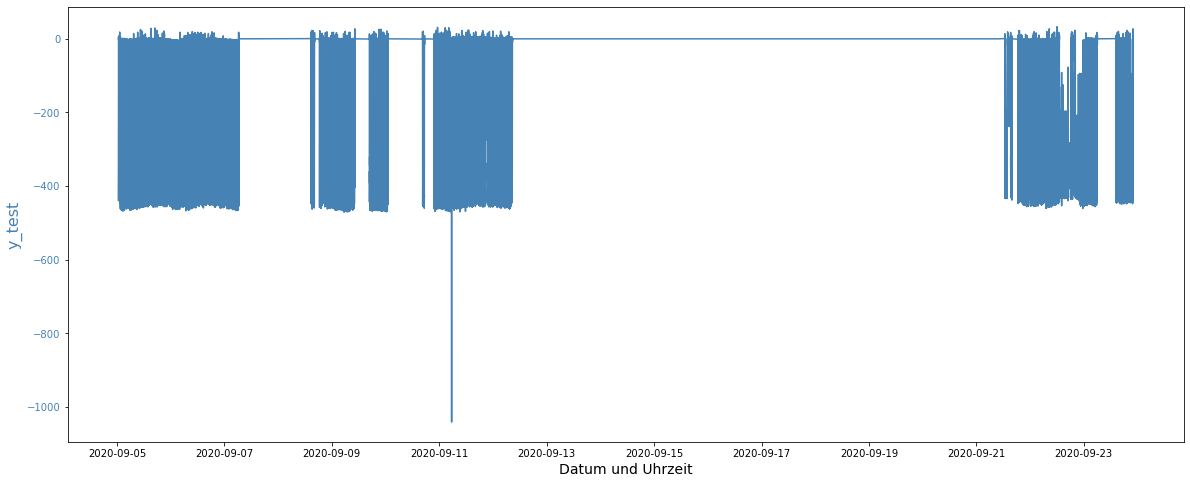

In [76]:
fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(ID_51_2020_09.CreateDateTime, ID_51_2020_09.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((0.5, 6))

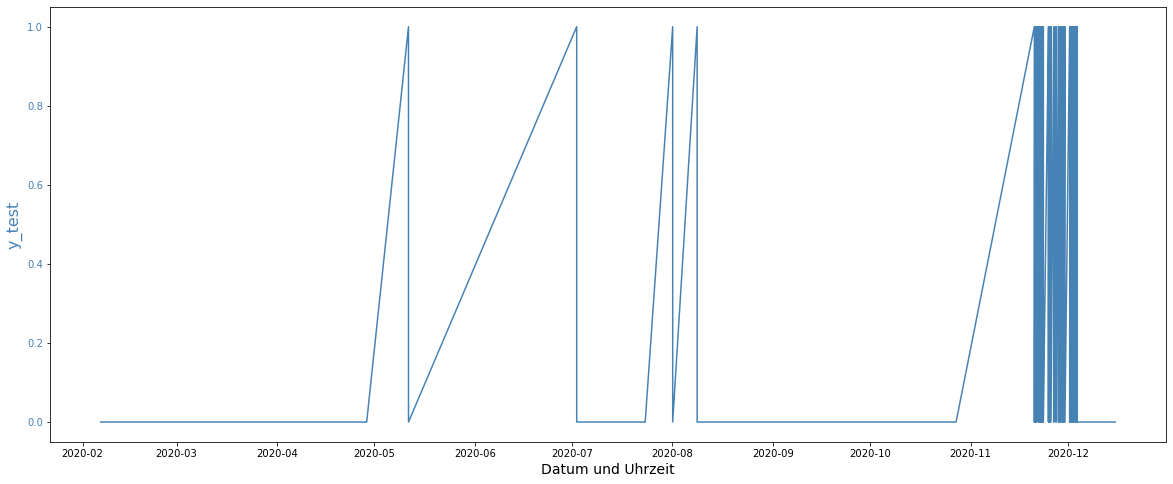

In [102]:
fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(ID_48_2020.CreateDateTime, ID_48_2020.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((0.5, 6))

In [ ]:
###目标变量
TREE_1 = pd.DataFrame()
TREE_1 = ID_51_2020_09
TREE_1 = TREE_1.copy()
TREE_1.rename(columns = {'TagValue':'TagValue_51'}, inplace=True)


###特征合并函数
def zusammen(data,TREE_1):
    data = data[(data['CreateDateTime']>'2020-09-05 00:00:00')&(data['CreateDateTime']<'2020-09-25 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_1 = TREE_1.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_1 = TREE_1.reset_index('CreateDateTime')
    return TREE_1


###合并特征
TREE_1 = zusammen(ID_85_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_1 = zusammen(ID_45_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_45'}, inplace=True)
TREE_1 = zusammen(ID_13_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_13'}, inplace=True)
TREE_1 = zusammen(ID_70_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_70'}, inplace=True)
TREE_1 = zusammen(ID_72_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_72'}, inplace=True)
TREE_1 = zusammen(ID_133_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_133'}, inplace=True)
TREE_1 = zusammen(ID_134_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_134'}, inplace=True)
TREE_1 = zusammen(ID_135_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_135'}, inplace=True)
TREE_1 = zusammen(ID_136_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_136'}, inplace=True)
TREE_1 = zusammen(ID_137_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_137'}, inplace=True)
TREE_1 = zusammen(ID_138_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_138'}, inplace=True)
TREE_1 = zusammen(ID_139_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_139'}, inplace=True)
TREE_1 = zusammen(ID_140_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_140'}, inplace=True)

TREE_1 = zusammen(ID_86_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_86'}, inplace=True)
TREE_1 = zusammen(ID_48_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_48'}, inplace=True)
TREE_1 = zusammen(ID_17_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_17'}, inplace=True)
TREE_1 = zusammen(ID_71_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_71'}, inplace=True)
TREE_1 = zusammen(ID_73_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_73'}, inplace=True)
TREE_1 = zusammen(ID_141_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_141'}, inplace=True)
TREE_1 = zusammen(ID_142_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_142'}, inplace=True)
TREE_1 = zusammen(ID_143_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_143'}, inplace=True)
TREE_1 = zusammen(ID_144_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_144'}, inplace=True)
TREE_1 = zusammen(ID_145_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_145'}, inplace=True)
TREE_1 = zusammen(ID_146_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_146'}, inplace=True)
TREE_1 = zusammen(ID_147_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_147'}, inplace=True)
TREE_1 = zusammen(ID_148_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_148'}, inplace=True)


TREE_1['TagValue_85'] = TREE_1['TagValue_85'].fillna(method = "ffill")
TREE_1['TagValue_45'] = TREE_1['TagValue_45'].fillna(method = "ffill")
TREE_1['TagValue_13'] = TREE_1['TagValue_13'].fillna(method = "ffill")
TREE_1['TagValue_70'] = TREE_1['TagValue_70'].fillna(method = "ffill")
TREE_1['TagValue_72'] = TREE_1['TagValue_72'].fillna(method = "ffill")
TREE_1['TagValue_133'] = TREE_1['TagValue_133'].fillna(method = "ffill")
TREE_1['TagValue_134'] = TREE_1['TagValue_134'].fillna(method = "ffill")
TREE_1['TagValue_135'] = TREE_1['TagValue_135'].fillna(method = "ffill")
TREE_1['TagValue_136'] = TREE_1['TagValue_136'].fillna(method = "ffill")
TREE_1['TagValue_137'] = TREE_1['TagValue_137'].fillna(method = "ffill")
TREE_1['TagValue_138'] = TREE_1['TagValue_138'].fillna(method = "ffill")
TREE_1['TagValue_139'] = TREE_1['TagValue_139'].fillna(method = "ffill")
TREE_1['TagValue_140'] = TREE_1['TagValue_140'].fillna(method = "ffill")
TREE_1['diff_float'] = TREE_1['CreateDateTime'].diff().dt.total_seconds()

TREE_1['TagValue_86'] = TREE_1['TagValue_86'].fillna(method = "ffill")
TREE_1['TagValue_48'] = TREE_1['TagValue_48'].fillna(method = "ffill")
TREE_1['TagValue_17'] = TREE_1['TagValue_17'].fillna(method = "ffill")
TREE_1['TagValue_71'] = TREE_1['TagValue_71'].fillna(method = "ffill")
TREE_1['TagValue_73'] = TREE_1['TagValue_73'].fillna(method = "ffill")
TREE_1['TagValue_141'] = TREE_1['TagValue_141'].fillna(method = "ffill")
TREE_1['TagValue_142'] = TREE_1['TagValue_142'].fillna(method = "ffill")
TREE_1['TagValue_143'] = TREE_1['TagValue_143'].fillna(method = "ffill")
TREE_1['TagValue_144'] = TREE_1['TagValue_144'].fillna(method = "ffill")
TREE_1['TagValue_145'] = TREE_1['TagValue_145'].fillna(method = "ffill")
TREE_1['TagValue_146'] = TREE_1['TagValue_146'].fillna(method = "ffill")
TREE_1['TagValue_147'] = TREE_1['TagValue_147'].fillna(method = "ffill")
TREE_1['TagValue_148'] = TREE_1['TagValue_148'].fillna(method = "ffill")
TREE_1 = TREE_1.drop('TagId',axis = 1)


###对过长停机时间做判断
TREE_1.loc[TREE_1['diff_float'] > 3600]

def NaNjgtc(data):
    data.loc[(data['diff_float'] > 3600),'TagValue_51'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_133'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_134'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_135'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_136'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_137'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_138'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_141'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_142'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_143'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_144'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_145'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data.loc[(data['diff_float'] > 3600),'TagValue_146'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
    data['timestamp'] = data['CreateDateTime'].values.astype(np.int64) // 10 ** 6
    s = data.set_index('timestamp')['TagValue_51'].interpolate(method='index',inpalce=True)
    data = pd.merge(left=data, right=s, on=['timestamp'])
    data['TagValue_51_x'] = data['TagValue_51_y']
    data = data.drop('TagValue_51_y',axis=1)
    data = data.drop('timestamp',axis=1)
    data = data.copy()
    data.rename(columns = {'TagValue_51_x':'TagValue_51'}, inplace=True)
    return data

TREE_2 = NaNjgtc(TREE_1)


###构建新的延时特征
#短延时特征
TREE_2['TagValue_51'] = TREE_2['TagValue_51'].fillna(method = "ffill")
TREE_2['TagValue_133_lag1'] = TREE_2['TagValue_133'].shift(1)
TREE_2['TagValue_133_lag2'] = TREE_2['TagValue_133'].shift(2)
TREE_2['TagValue_134_lag1'] = TREE_2['TagValue_134'].shift(1)
TREE_2['TagValue_134_lag2'] = TREE_2['TagValue_134'].shift(2)
TREE_2['TagValue_135_lag1'] = TREE_2['TagValue_135'].shift(1)
TREE_2['TagValue_135_lag2'] = TREE_2['TagValue_135'].shift(2)
TREE_2['TagValue_136_lag1'] = TREE_2['TagValue_136'].shift(1)
TREE_2['TagValue_136_lag2'] = TREE_2['TagValue_136'].shift(2)
TREE_2['TagValue_137_lag1'] = TREE_2['TagValue_137'].shift(1)
TREE_2['TagValue_137_lag2'] = TREE_2['TagValue_137'].shift(2)
TREE_2['TagValue_138_lag1'] = TREE_2['TagValue_138'].shift(1)
TREE_2['TagValue_138_lag2'] = TREE_2['TagValue_138'].shift(2)
TREE_2['TagValue_141_lag1'] = TREE_2['TagValue_141'].shift(1)
TREE_2['TagValue_141_lag2'] = TREE_2['TagValue_141'].shift(2)
TREE_2['TagValue_142_lag1'] = TREE_2['TagValue_142'].shift(1)
TREE_2['TagValue_142_lag2'] = TREE_2['TagValue_142'].shift(2)
TREE_2['TagValue_143_lag1'] = TREE_2['TagValue_143'].shift(1)
TREE_2['TagValue_143_lag2'] = TREE_2['TagValue_143'].shift(2)
TREE_2['TagValue_144_lag1'] = TREE_2['TagValue_144'].shift(1)
TREE_2['TagValue_144_lag2'] = TREE_2['TagValue_144'].shift(2)
TREE_2['TagValue_145_lag1'] = TREE_2['TagValue_145'].shift(1)
TREE_2['TagValue_145_lag2'] = TREE_2['TagValue_145'].shift(2)
TREE_2['TagValue_146_lag1'] = TREE_2['TagValue_146'].shift(1)
TREE_2['TagValue_146_lag2'] = TREE_2['TagValue_146'].shift(2)


#长延时特征
gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_0'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_1'] = ID_85_2020['CreateDateTime']
gh['TagValue'] = ID_85_2020['TagValue']
gh['TagId'] = ID_85_2020['TagId']
er = pd.DataFrame()
er['CreateDateTime'] = ID_45_2020['CreateDateTime']
er['CreateDateTime_45_0'] = ID_45_2020['CreateDateTime']
er['TagValue'] = ID_45_2020['TagValue']
er['TagId'] = ID_45_2020['TagId']

TREE_2 = zusammen(gh,TREE_2)
TREE_2['CreateDateTime_85_0'] = TREE_2['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_85_1'] = TREE_2['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_2['deltatime_85_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_85_0'] 
TREE_2['deltatime_85_0'] = TREE_2['deltatime_85_0'].dt.total_seconds()
TREE_2['deltatime_85_1'] = TREE_2['CreateDateTime_85_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_85_1'] = TREE_2['deltatime_85_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_1',axis = 1)
TREE_2 = zusammen(er,TREE_2)
TREE_2['CreateDateTime_45_0'] = TREE_2['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_2['deltatime_45_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_45_0'] 
TREE_2['deltatime_45_0'] = TREE_2['deltatime_45_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_45_0',axis = 1)


gh1 = pd.DataFrame()
gh1['CreateDateTime'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_0'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_1'] = ID_86_2020['CreateDateTime']
gh1['TagValue'] = ID_86_2020['TagValue']
gh1['TagId'] = ID_86_2020['TagId']
er1 = pd.DataFrame()
er1['CreateDateTime'] = ID_48_2020['CreateDateTime']
er1['CreateDateTime_48_0'] = ID_48_2020['CreateDateTime']
er1['TagValue'] = ID_48_2020['TagValue']
er1['TagId'] = ID_48_2020['TagId']

TREE_2 = zusammen(gh1,TREE_2)
TREE_2['CreateDateTime_86_0'] = TREE_2['CreateDateTime_86_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_86_1'] = TREE_2['CreateDateTime_86_1'].fillna(method = "bfill")
TREE_2['deltatime_86_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_86_0'] 
TREE_2['deltatime_86_0'] = TREE_2['deltatime_86_0'].dt.total_seconds()
TREE_2['deltatime_86_1'] = TREE_2['CreateDateTime_86_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_86_1'] = TREE_2['deltatime_86_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_86_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_86_1',axis = 1)
TREE_2 = zusammen(er1,TREE_2)
TREE_2['CreateDateTime_48_0'] = TREE_2['CreateDateTime_48_0'].fillna(method = "ffill")
TREE_2['deltatime_48_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_48_0'] 
TREE_2['deltatime_48_0'] = TREE_2['deltatime_48_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_48_0',axis = 1)
TREE_2=TREE_2.copy()
TREE_2['timestamp'] = TREE_2['CreateDateTime'].values.astype(np.int64) // 10 ** 6 

In [13]:
###目标变量
TREE_1 = pd.DataFrame()
TREE_1 = ID_51_2020_09
TREE_1 = TREE_1.copy()
TREE_1.rename(columns = {'TagValue':'TagValue_51'}, inplace=True)

In [14]:
###特征合并函数
def zusammen(data,TREE_1):
    data = data[(data['CreateDateTime']>'2020-09-05 00:00:00')&(data['CreateDateTime']<'2020-09-25 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_1 = TREE_1.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_1 = TREE_1.reset_index('CreateDateTime')
#     TREE_1 = TREE_1.fillna(method = "ffill")
    return TREE_1


###合并特征
TREE_1 = zusammen(ID_85_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_1 = zusammen(ID_45_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_45'}, inplace=True)
TREE_1 = zusammen(ID_13_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_13'}, inplace=True)
TREE_1 = zusammen(ID_70_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_70'}, inplace=True)
TREE_1 = zusammen(ID_72_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_72'}, inplace=True)
TREE_1 = zusammen(ID_133_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_133'}, inplace=True)
TREE_1 = zusammen(ID_134_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_134'}, inplace=True)
TREE_1 = zusammen(ID_135_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_135'}, inplace=True)
TREE_1 = zusammen(ID_136_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_136'}, inplace=True)
TREE_1 = zusammen(ID_137_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_137'}, inplace=True)
TREE_1 = zusammen(ID_138_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_138'}, inplace=True)
TREE_1 = zusammen(ID_139_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_139'}, inplace=True)
TREE_1 = zusammen(ID_140_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_140'}, inplace=True)

TREE_1 = zusammen(ID_86_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_86'}, inplace=True)
TREE_1 = zusammen(ID_48_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_48'}, inplace=True)
TREE_1 = zusammen(ID_17_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_17'}, inplace=True)
TREE_1 = zusammen(ID_71_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_71'}, inplace=True)
TREE_1 = zusammen(ID_73_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_73'}, inplace=True)
TREE_1 = zusammen(ID_141_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_141'}, inplace=True)
TREE_1 = zusammen(ID_142_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_142'}, inplace=True)
TREE_1 = zusammen(ID_143_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_143'}, inplace=True)
TREE_1 = zusammen(ID_144_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_144'}, inplace=True)
TREE_1 = zusammen(ID_145_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_145'}, inplace=True)
TREE_1 = zusammen(ID_146_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_146'}, inplace=True)
TREE_1 = zusammen(ID_147_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_147'}, inplace=True)
TREE_1 = zusammen(ID_148_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_148'}, inplace=True)


TREE_1['TagValue_85'] = TREE_1['TagValue_85'].fillna(method = "ffill")
TREE_1['TagValue_45'] = TREE_1['TagValue_45'].fillna(method = "ffill")
TREE_1['TagValue_13'] = TREE_1['TagValue_13'].fillna(method = "ffill")
TREE_1['TagValue_70'] = TREE_1['TagValue_70'].fillna(method = "ffill")
TREE_1['TagValue_72'] = TREE_1['TagValue_72'].fillna(method = "ffill")
TREE_1['TagValue_133'] = TREE_1['TagValue_133'].fillna(method = "ffill")
TREE_1['TagValue_134'] = TREE_1['TagValue_134'].fillna(method = "ffill")
TREE_1['TagValue_135'] = TREE_1['TagValue_135'].fillna(method = "ffill")
TREE_1['TagValue_136'] = TREE_1['TagValue_136'].fillna(method = "ffill")
TREE_1['TagValue_137'] = TREE_1['TagValue_137'].fillna(method = "ffill")
TREE_1['TagValue_138'] = TREE_1['TagValue_138'].fillna(method = "ffill")
TREE_1['TagValue_139'] = TREE_1['TagValue_139'].fillna(method = "ffill")
TREE_1['TagValue_140'] = TREE_1['TagValue_140'].fillna(method = "ffill")
TREE_1['diff_float'] = TREE_1['CreateDateTime'].diff().dt.total_seconds()

TREE_1['TagValue_86'] = TREE_1['TagValue_86'].fillna(method = "ffill")
TREE_1['TagValue_48'] = TREE_1['TagValue_48'].fillna(method = "ffill")
TREE_1['TagValue_17'] = TREE_1['TagValue_17'].fillna(method = "ffill")
TREE_1['TagValue_71'] = TREE_1['TagValue_71'].fillna(method = "ffill")
TREE_1['TagValue_73'] = TREE_1['TagValue_73'].fillna(method = "ffill")
TREE_1['TagValue_141'] = TREE_1['TagValue_141'].fillna(method = "ffill")
TREE_1['TagValue_142'] = TREE_1['TagValue_142'].fillna(method = "ffill")
TREE_1['TagValue_143'] = TREE_1['TagValue_143'].fillna(method = "ffill")
TREE_1['TagValue_144'] = TREE_1['TagValue_144'].fillna(method = "ffill")
TREE_1['TagValue_145'] = TREE_1['TagValue_145'].fillna(method = "ffill")
TREE_1['TagValue_146'] = TREE_1['TagValue_146'].fillna(method = "ffill")
TREE_1['TagValue_147'] = TREE_1['TagValue_147'].fillna(method = "ffill")
TREE_1['TagValue_148'] = TREE_1['TagValue_148'].fillna(method = "ffill")


In [15]:
TREE_1.isnull().sum()

CreateDateTime          0
TagValue_51        287381
TagId              287381
TagValue_85          3040
TagValue_45          3774
TagValue_13          3041
TagValue_70          2990
TagValue_72          3146
TagValue_133         2991
TagValue_134         3026
TagValue_135         3036
TagValue_136         3119
TagValue_137         3308
TagValue_138         3426
TagValue_139         2990
TagValue_140         3022
TagValue_86           505
TagValue_48       1456555
TagValue_17          1273
TagValue_71           478
TagValue_73           623
TagValue_141            0
TagValue_142            2
TagValue_143            4
TagValue_144            6
TagValue_145            8
TagValue_146           10
TagValue_147          479
TagValue_148          497
diff_float              1
dtype: int64

In [16]:
###对过长停机时间做判断
TREE_1.loc[TREE_1['diff_float'] > 3600]

def NaNjgtc(data):
#     columns = [col for col in data.columns if col in ['CreateDateTime', 'TagValue_51', 'diff_float']]
#     X = TREE_1[columns]
#     X.isnull().sum()
#     X.loc[(X['diff_float'] > 1800)]
    data.loc[(data['diff_float'] > 3600),'TagValue_51'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
#     X.loc[(X['diff_float'] > 1800)]
#     X.isnull().sum()
    return data

TREE_2 = NaNjgtc(TREE_1)


###构建新的延时特征
TREE_2['TagValue_51'] = TREE_2['TagValue_51'].fillna(method = "ffill")
TREE_2 = TREE_2.drop('TagId',axis = 1)
TREE_2['TagValue_133_lag1'] = TREE_2['TagValue_133'].shift(1)
TREE_2['TagValue_133_lag2'] = TREE_2['TagValue_133'].shift(2)
TREE_2['TagValue_134_lag1'] = TREE_2['TagValue_134'].shift(1)
TREE_2['TagValue_134_lag2'] = TREE_2['TagValue_134'].shift(2)
TREE_2['TagValue_135_lag1'] = TREE_2['TagValue_135'].shift(1)
TREE_2['TagValue_135_lag2'] = TREE_2['TagValue_135'].shift(2)
TREE_2['TagValue_136_lag1'] = TREE_2['TagValue_136'].shift(1)
TREE_2['TagValue_136_lag2'] = TREE_2['TagValue_136'].shift(2)
TREE_2['TagValue_137_lag1'] = TREE_2['TagValue_137'].shift(1)
TREE_2['TagValue_137_lag2'] = TREE_2['TagValue_137'].shift(2)
TREE_2['TagValue_138_lag1'] = TREE_2['TagValue_138'].shift(1)
TREE_2['TagValue_138_lag2'] = TREE_2['TagValue_138'].shift(2)
TREE_2['TagValue_141_lag1'] = TREE_2['TagValue_141'].shift(1)
TREE_2['TagValue_141_lag2'] = TREE_2['TagValue_141'].shift(2)
TREE_2['TagValue_142_lag1'] = TREE_2['TagValue_142'].shift(1)
TREE_2['TagValue_142_lag2'] = TREE_2['TagValue_142'].shift(2)
TREE_2['TagValue_143_lag1'] = TREE_2['TagValue_143'].shift(1)
TREE_2['TagValue_143_lag2'] = TREE_2['TagValue_143'].shift(2)
TREE_2['TagValue_144_lag1'] = TREE_2['TagValue_144'].shift(1)
TREE_2['TagValue_144_lag2'] = TREE_2['TagValue_144'].shift(2)
TREE_2['TagValue_145_lag1'] = TREE_2['TagValue_145'].shift(1)
TREE_2['TagValue_145_lag2'] = TREE_2['TagValue_145'].shift(2)
TREE_2['TagValue_146_lag1'] = TREE_2['TagValue_146'].shift(1)
TREE_2['TagValue_146_lag2'] = TREE_2['TagValue_146'].shift(2)
# TREE_2['diff_52'] = TREE_2['TagValue_52'].diff()
TREE_2

,CreateDateTime,TagValue_51,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_133,TagValue_134,TagValue_135,...,TagValue_142_lag1,TagValue_142_lag2,TagValue_143_lag1,TagValue_143_lag2,TagValue_144_lag1,TagValue_144_lag2,TagValue_145_lag1,TagValue_145_lag2,TagValue_146_lag1,TagValue_146_lag2
0,2020-09-05 00:00:02.563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-05 00:00:03.199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-09-05 00:00:13.404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-09-05 00:00:14.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-09-05 00:00:24.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125446,2020-09-23 22:44:23.107,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2125447,2020-09-23 22:44:33.140,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2125448,2020-09-23 22:44:33.772,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2125449,2020-09-23 22:44:43.985,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_0'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_1'] = ID_85_2020['CreateDateTime']
gh['TagValue'] = ID_85_2020['TagValue']
gh['TagId'] = ID_85_2020['TagId']
er = pd.DataFrame()
er['CreateDateTime'] = ID_45_2020['CreateDateTime']
er['CreateDateTime_45_0'] = ID_45_2020['CreateDateTime']
er['TagValue'] = ID_45_2020['TagValue']
er['TagId'] = ID_45_2020['TagId']

TREE_2 = zusammen(gh,TREE_2)
TREE_2['CreateDateTime_85_0'] = TREE_2['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_85_1'] = TREE_2['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_2['deltatime_85_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_85_0'] 
TREE_2['deltatime_85_0'] = TREE_2['deltatime_85_0'].dt.total_seconds()
TREE_2['deltatime_85_1'] = TREE_2['CreateDateTime_85_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_85_1'] = TREE_2['deltatime_85_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_1',axis = 1)
TREE_2 = zusammen(er,TREE_2)
TREE_2['CreateDateTime_45_0'] = TREE_2['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_2['deltatime_45_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_45_0'] 
TREE_2['deltatime_45_0'] = TREE_2['deltatime_45_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_45_0',axis = 1)
TREE_2

,CreateDateTime,TagValue_51,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_133,TagValue_134,TagValue_135,...,TagValue_143_lag2,TagValue_144_lag1,TagValue_144_lag2,TagValue_145_lag1,TagValue_145_lag2,TagValue_146_lag1,TagValue_146_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0
0,2020-09-05 00:00:02.563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3454.601,NaN
1,2020-09-05 00:00:03.199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3453.965,NaN
2,2020-09-05 00:00:13.404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3443.760,NaN
3,2020-09-05 00:00:14.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3443.138,NaN
4,2020-09-05 00:00:24.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3432.940,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125446,2020-09-23 22:44:23.107,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3414.977,NaN,4018.802
2125447,2020-09-23 22:44:33.140,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3425.010,NaN,4028.835
2125448,2020-09-23 22:44:33.772,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3425.642,NaN,4029.467
2125449,2020-09-23 22:44:43.985,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3435.855,NaN,4039.680


In [18]:
gh1 = pd.DataFrame()
gh1['CreateDateTime'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_0'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_1'] = ID_86_2020['CreateDateTime']
gh1['TagValue'] = ID_86_2020['TagValue']
gh1['TagId'] = ID_86_2020['TagId']
er1 = pd.DataFrame()
er1['CreateDateTime'] = ID_48_2020['CreateDateTime']
er1['CreateDateTime_48_0'] = ID_48_2020['CreateDateTime']
er1['TagValue'] = ID_48_2020['TagValue']
er1['TagId'] = ID_48_2020['TagId']

TREE_2 = zusammen(gh1,TREE_2)
TREE_2['CreateDateTime_86_0'] = TREE_2['CreateDateTime_86_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_86_1'] = TREE_2['CreateDateTime_86_1'].fillna(method = "bfill")
TREE_2['deltatime_86_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_86_0'] 
TREE_2['deltatime_86_0'] = TREE_2['deltatime_86_0'].dt.total_seconds()
TREE_2['deltatime_86_1'] = TREE_2['CreateDateTime_86_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_86_1'] = TREE_2['deltatime_86_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_86_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_86_1',axis = 1)
TREE_2 = zusammen(er1,TREE_2)
TREE_2['CreateDateTime_48_0'] = TREE_2['CreateDateTime_48_0'].fillna(method = "ffill")
TREE_2['deltatime_48_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_48_0'] 
TREE_2['deltatime_48_0'] = TREE_2['deltatime_48_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_48_0',axis = 1)
TREE_2=TREE_2.copy()
TREE_2['timestamp'] = TREE_2['CreateDateTime'].values.astype(np.int64) // 10 ** 6 

In [19]:
TREE_2.isnull().sum()

CreateDateTime             0
TagValue_51              507
TagValue_85             3040
TagValue_45             3774
TagValue_13             3041
TagValue_70             2990
TagValue_72             3146
TagValue_133            2991
TagValue_134            3026
TagValue_135            3036
TagValue_136            3119
TagValue_137            3308
TagValue_138            3426
TagValue_139            2990
TagValue_140            3022
TagValue_86              505
TagValue_48          1456555
TagValue_17             1273
TagValue_71              478
TagValue_73              623
TagValue_141               0
TagValue_142               2
TagValue_143               4
TagValue_144               6
TagValue_145               8
TagValue_146              10
TagValue_147             479
TagValue_148             497
diff_float                 1
TagValue_133_lag1       2992
TagValue_133_lag2       2993
TagValue_134_lag1       3027
TagValue_134_lag2       3028
TagValue_135_lag1       3037
TagValue_135_l

In [20]:
TREE_2['TagValue_48'] = TREE_2['TagValue_48'].fillna(0)
TREE_2['deltatime_48_0'] = TREE_2['deltatime_48_0'].fillna(0)
TREE_2.isnull().sum()

CreateDateTime          0
TagValue_51           507
TagValue_85          3040
TagValue_45          3774
TagValue_13          3041
TagValue_70          2990
TagValue_72          3146
TagValue_133         2991
TagValue_134         3026
TagValue_135         3036
TagValue_136         3119
TagValue_137         3308
TagValue_138         3426
TagValue_139         2990
TagValue_140         3022
TagValue_86           505
TagValue_48             0
TagValue_17          1273
TagValue_71           478
TagValue_73           623
TagValue_141            0
TagValue_142            2
TagValue_143            4
TagValue_144            6
TagValue_145            8
TagValue_146           10
TagValue_147          479
TagValue_148          497
diff_float              1
TagValue_133_lag1    2992
TagValue_133_lag2    2993
TagValue_134_lag1    3027
TagValue_134_lag2    3028
TagValue_135_lag1    3037
TagValue_135_lag2    3038
TagValue_136_lag1    3120
TagValue_136_lag2    3121
TagValue_137_lag1    3309
TagValue_137

In [21]:
TREE_2 = TREE_2.dropna()
TREE_2

,CreateDateTime,TagValue_51,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_133,TagValue_134,TagValue_135,...,TagValue_145_lag2,TagValue_146_lag1,TagValue_146_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,timestamp
3774,2020-09-05 01:00:39.291,-411.45831,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,182.127,393.811,0.000,805.396,523.892,0.000,1599267639291
3775,2020-09-05 01:00:39.486,-411.45831,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,182.322,393.616,0.195,805.591,523.697,0.000,1599267639486
3776,2020-09-05 01:00:39.496,-405.67130,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,182.332,393.606,0.205,805.601,523.687,0.000,1599267639496
3777,2020-09-05 01:00:39.705,-401.04169,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,182.541,393.397,0.414,805.810,523.478,0.000,1599267639705
3778,2020-09-05 01:00:39.913,-396.99069,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,182.749,393.189,0.622,806.018,523.270,0.000,1599267639913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121934,2020-09-23 21:47:27.322,-271.41199,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2276.407,0.808,603.017,2276.407,0.808,216734.255,1600897647322
2121935,2020-09-23 21:47:27.740,-271.41199,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2276.825,0.390,603.435,2276.825,0.390,216734.673,1600897647740
2121936,2020-09-23 21:47:27.741,-252.31480,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2276.826,0.389,603.436,2276.826,0.389,216734.674,1600897647741
2121937,2020-09-23 21:47:27.927,-248.26390,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2277.012,0.203,603.622,2277.012,0.203,216734.860,1600897647927


In [84]:
###目标变量
TREE_1 = pd.DataFrame()
TREE_1 = ID_51_2020_09
TREE_1 = TREE_1.copy()
TREE_1.rename(columns = {'TagValue':'TagValue_51'}, inplace=True)


###特征合并函数
def zusammen(data,TREE_1):
    data = data[(data['CreateDateTime']>'2020-09-05 00:00:00')&(data['CreateDateTime']<'2020-09-25 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_1 = TREE_1.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_1 = TREE_1.reset_index('CreateDateTime')
#     TREE_1 = TREE_1.fillna(method = "ffill")
    return TREE_1


###合并特征
TREE_1 = zusammen(ID_85_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_1 = zusammen(ID_45_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_45'}, inplace=True)
TREE_1 = zusammen(ID_13_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_13'}, inplace=True)
TREE_1 = zusammen(ID_70_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_70'}, inplace=True)
TREE_1 = zusammen(ID_72_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_72'}, inplace=True)
TREE_1 = zusammen(ID_133_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_133'}, inplace=True)
TREE_1 = zusammen(ID_134_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_134'}, inplace=True)
TREE_1 = zusammen(ID_135_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_135'}, inplace=True)
TREE_1 = zusammen(ID_136_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_136'}, inplace=True)
TREE_1 = zusammen(ID_137_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_137'}, inplace=True)
TREE_1 = zusammen(ID_138_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_138'}, inplace=True)
TREE_1 = zusammen(ID_139_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_139'}, inplace=True)
TREE_1 = zusammen(ID_140_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_140'}, inplace=True)

TREE_1 = zusammen(ID_86_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_86'}, inplace=True)
TREE_1 = zusammen(ID_48_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_48'}, inplace=True)
TREE_1 = zusammen(ID_17_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_17'}, inplace=True)
TREE_1 = zusammen(ID_71_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_71'}, inplace=True)
TREE_1 = zusammen(ID_73_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_73'}, inplace=True)
TREE_1 = zusammen(ID_141_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_141'}, inplace=True)
TREE_1 = zusammen(ID_142_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_142'}, inplace=True)
TREE_1 = zusammen(ID_143_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_143'}, inplace=True)
TREE_1 = zusammen(ID_144_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_144'}, inplace=True)
TREE_1 = zusammen(ID_145_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_145'}, inplace=True)
TREE_1 = zusammen(ID_146_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_146'}, inplace=True)
TREE_1 = zusammen(ID_147_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_147'}, inplace=True)
TREE_1 = zusammen(ID_148_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_148'}, inplace=True)


TREE_1['TagValue_85'] = TREE_1['TagValue_85'].fillna(method = "ffill")
TREE_1['TagValue_45'] = TREE_1['TagValue_45'].fillna(method = "ffill")
TREE_1['TagValue_13'] = TREE_1['TagValue_13'].fillna(method = "ffill")
TREE_1['TagValue_70'] = TREE_1['TagValue_70'].fillna(method = "ffill")
TREE_1['TagValue_72'] = TREE_1['TagValue_72'].fillna(method = "ffill")
TREE_1['TagValue_133'] = TREE_1['TagValue_133'].fillna(method = "ffill")
TREE_1['TagValue_134'] = TREE_1['TagValue_134'].fillna(method = "ffill")
TREE_1['TagValue_135'] = TREE_1['TagValue_135'].fillna(method = "ffill")
TREE_1['TagValue_136'] = TREE_1['TagValue_136'].fillna(method = "ffill")
TREE_1['TagValue_137'] = TREE_1['TagValue_137'].fillna(method = "ffill")
TREE_1['TagValue_138'] = TREE_1['TagValue_138'].fillna(method = "ffill")
TREE_1['TagValue_139'] = TREE_1['TagValue_139'].fillna(method = "ffill")
TREE_1['TagValue_140'] = TREE_1['TagValue_140'].fillna(method = "ffill")
TREE_1['diff_float'] = TREE_1['CreateDateTime'].diff().dt.total_seconds()

TREE_1['TagValue_86'] = TREE_1['TagValue_86'].fillna(method = "ffill")
TREE_1['TagValue_48'] = TREE_1['TagValue_48'].fillna(method = "ffill")
TREE_1['TagValue_17'] = TREE_1['TagValue_17'].fillna(method = "ffill")
TREE_1['TagValue_71'] = TREE_1['TagValue_71'].fillna(method = "ffill")
TREE_1['TagValue_73'] = TREE_1['TagValue_73'].fillna(method = "ffill")
TREE_1['TagValue_141'] = TREE_1['TagValue_141'].fillna(method = "ffill")
TREE_1['TagValue_142'] = TREE_1['TagValue_142'].fillna(method = "ffill")
TREE_1['TagValue_143'] = TREE_1['TagValue_143'].fillna(method = "ffill")
TREE_1['TagValue_144'] = TREE_1['TagValue_144'].fillna(method = "ffill")
TREE_1['TagValue_145'] = TREE_1['TagValue_145'].fillna(method = "ffill")
TREE_1['TagValue_146'] = TREE_1['TagValue_146'].fillna(method = "ffill")
TREE_1['TagValue_147'] = TREE_1['TagValue_147'].fillna(method = "ffill")
TREE_1['TagValue_148'] = TREE_1['TagValue_148'].fillna(method = "ffill")


###对过长停机时间做判断
TREE_1.loc[TREE_1['diff_float'] > 1800]

def NaNjgtc(data):
#     columns = [col for col in data.columns if col in ['CreateDateTime', 'TagValue_51', 'diff_float']]
#     X = TREE_1[columns]
#     X.isnull().sum()
#     X.loc[(X['diff_float'] > 1800)]
    data.loc[(data['diff_float'] > 1800),'TagValue_51'] = data.loc[(data['diff_float'] > 3600),'TagValue_51'].fillna(0)
#     X.loc[(X['diff_float'] > 1800)]
#     X.isnull().sum()
    return data

TREE_2 = NaNjgtc(TREE_1)


###构建新的延时特征
TREE_2['TagValue_51'] = TREE_2['TagValue_51'].fillna(method = "ffill")
TREE_2 = TREE_2.drop('TagId',axis = 1)
TREE_2['TagValue_133_lag1'] = TREE_2['TagValue_133'].shift(1)
TREE_2['TagValue_133_lag2'] = TREE_2['TagValue_133'].shift(2)
TREE_2['TagValue_134_lag1'] = TREE_2['TagValue_134'].shift(1)
TREE_2['TagValue_134_lag2'] = TREE_2['TagValue_134'].shift(2)
TREE_2['TagValue_135_lag1'] = TREE_2['TagValue_135'].shift(1)
TREE_2['TagValue_135_lag2'] = TREE_2['TagValue_135'].shift(2)
TREE_2['TagValue_136_lag1'] = TREE_2['TagValue_136'].shift(1)
TREE_2['TagValue_136_lag2'] = TREE_2['TagValue_136'].shift(2)
TREE_2['TagValue_137_lag1'] = TREE_2['TagValue_137'].shift(1)
TREE_2['TagValue_137_lag2'] = TREE_2['TagValue_137'].shift(2)
TREE_2['TagValue_138_lag1'] = TREE_2['TagValue_138'].shift(1)
TREE_2['TagValue_138_lag2'] = TREE_2['TagValue_138'].shift(2)
TREE_2['TagValue_141_lag1'] = TREE_2['TagValue_141'].shift(1)
TREE_2['TagValue_141_lag2'] = TREE_2['TagValue_141'].shift(2)
TREE_2['TagValue_142_lag1'] = TREE_2['TagValue_142'].shift(1)
TREE_2['TagValue_142_lag2'] = TREE_2['TagValue_142'].shift(2)
TREE_2['TagValue_143_lag1'] = TREE_2['TagValue_143'].shift(1)
TREE_2['TagValue_143_lag2'] = TREE_2['TagValue_143'].shift(2)
TREE_2['TagValue_144_lag1'] = TREE_2['TagValue_144'].shift(1)
TREE_2['TagValue_144_lag2'] = TREE_2['TagValue_144'].shift(2)
TREE_2['TagValue_145_lag1'] = TREE_2['TagValue_145'].shift(1)
TREE_2['TagValue_145_lag2'] = TREE_2['TagValue_145'].shift(2)
TREE_2['TagValue_146_lag1'] = TREE_2['TagValue_146'].shift(1)
TREE_2['TagValue_146_lag2'] = TREE_2['TagValue_146'].shift(2)
# TREE_2['diff_52'] = TREE_2['TagValue_52'].diff()

gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_0'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_1'] = ID_85_2020['CreateDateTime']
gh['TagValue'] = ID_85_2020['TagValue']
gh['TagId'] = ID_85_2020['TagId']
er = pd.DataFrame()
er['CreateDateTime'] = ID_45_2020['CreateDateTime']
er['CreateDateTime_45_0'] = ID_45_2020['CreateDateTime']
er['TagValue'] = ID_45_2020['TagValue']
er['TagId'] = ID_45_2020['TagId']

TREE_2 = zusammen(gh,TREE_2)
TREE_2['CreateDateTime_85_0'] = TREE_2['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_85_1'] = TREE_2['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_2['deltatime_85_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_85_0'] 
TREE_2['deltatime_85_0'] = TREE_2['deltatime_85_0'].dt.total_seconds()
TREE_2['deltatime_85_1'] = TREE_2['CreateDateTime_85_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_85_1'] = TREE_2['deltatime_85_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_1',axis = 1)
TREE_2 = zusammen(er,TREE_2)
TREE_2['CreateDateTime_45_0'] = TREE_2['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_2['deltatime_45_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_45_0'] 
TREE_2['deltatime_45_0'] = TREE_2['deltatime_45_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_45_0',axis = 1)


gh1 = pd.DataFrame()
gh1['CreateDateTime'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_0'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_1'] = ID_86_2020['CreateDateTime']
gh1['TagValue'] = ID_86_2020['TagValue']
gh1['TagId'] = ID_86_2020['TagId']
er1 = pd.DataFrame()
er1['CreateDateTime'] = ID_48_2020['CreateDateTime']
er1['CreateDateTime_48_0'] = ID_48_2020['CreateDateTime']
er1['TagValue'] = ID_48_2020['TagValue']
er1['TagId'] = ID_48_2020['TagId']

TREE_2 = zusammen(gh1,TREE_2)
TREE_2['CreateDateTime_86_0'] = TREE_2['CreateDateTime_86_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_86_1'] = TREE_2['CreateDateTime_86_1'].fillna(method = "bfill")
TREE_2['deltatime_86_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_86_0'] 
TREE_2['deltatime_86_0'] = TREE_2['deltatime_86_0'].dt.total_seconds()
TREE_2['deltatime_86_1'] = TREE_2['CreateDateTime_86_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_86_1'] = TREE_2['deltatime_86_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_86_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_86_1',axis = 1)
TREE_2 = zusammen(er1,TREE_2)
TREE_2['CreateDateTime_48_0'] = TREE_2['CreateDateTime_48_0'].fillna(method = "ffill")
TREE_2['deltatime_48_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_48_0'] 
TREE_2['deltatime_48_0'] = TREE_2['deltatime_48_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_48_0',axis = 1)
TREE_2=TREE_2.copy()
TREE_2['timestamp'] = TREE_2['CreateDateTime'].values.astype(np.int64) // 10 ** 6 
TREE_2 = TREE_2.dropna()
TREE_2

,CreateDateTime,TagValue_51,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_133,TagValue_134,TagValue_135,...,TagValue_145_lag2,TagValue_146_lag1,TagValue_146_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,timestamp
1456555,2020-09-21 09:35:13.067,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.005,11127.127,0.000,0.005,32223.574,0.000,1600680913067
1456556,2020-09-21 09:35:19.599,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.537,11120.595,6.532,6.537,32217.042,6.532,1600680919599
1456557,2020-09-21 09:35:20.007,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.945,11120.187,6.940,6.945,32216.634,6.940,1600680920007
1456558,2020-09-21 09:35:30.264,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,17.202,11109.930,17.197,17.202,32206.377,17.197,1600680930264
1456559,2020-09-21 09:35:30.861,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,17.799,11109.333,17.794,17.799,32205.780,17.794,1600680930861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121934,2020-09-23 21:47:27.322,-271.41199,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2276.407,0.808,603.017,2276.407,0.808,216734.255,1600897647322
2121935,2020-09-23 21:47:27.740,-271.41199,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2276.825,0.390,603.435,2276.825,0.390,216734.673,1600897647740
2121936,2020-09-23 21:47:27.741,-252.31480,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2276.826,0.389,603.436,2276.826,0.389,216734.674,1600897647741
2121937,2020-09-23 21:47:27.927,-248.26390,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2277.012,0.203,603.622,2277.012,0.203,216734.860,1600897647927


In [22]:
X_test_09 = TREE_2.drop('timestamp',axis = 1)
X_test_09 = X_test_09.drop('CreateDateTime',axis = 1)
X_test_09 = X_test_09.drop('TagValue_51',axis = 1)
X_test_09

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,...,TagValue_145_lag1,TagValue_145_lag2,TagValue_146_lag1,TagValue_146_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0
3774,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,182.127,393.811,0.000,805.396,523.892,0.000
3775,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,182.322,393.616,0.195,805.591,523.697,0.000
3776,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,182.332,393.606,0.205,805.601,523.687,0.000
3777,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,182.541,393.397,0.414,805.810,523.478,0.000
3778,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,182.749,393.189,0.622,806.018,523.270,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121934,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2276.407,0.808,603.017,2276.407,0.808,216734.255
2121935,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2276.825,0.390,603.435,2276.825,0.390,216734.673
2121936,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2276.826,0.389,603.436,2276.826,0.389,216734.674
2121937,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2277.012,0.203,603.622,2277.012,0.203,216734.860


In [23]:
y_pred_09 = gbm.predict(X_test_09, num_iteration=gbm.best_iteration)

In [24]:
X_test_09['y_pred_09'] = y_pred_09
left = X_test_09
right = TREE_2['CreateDateTime']
result = pd.merge(left, right, how='left', left_index=True, right_index=True)
result['y_test'] = TREE_2['TagValue_51']
result

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,...,TagValue_146_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,y_pred_09,CreateDateTime,y_test
3774,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,182.127,393.811,0.000,805.396,523.892,0.000,-415.512023,2020-09-05 01:00:39.291,-411.45831
3775,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,182.322,393.616,0.195,805.591,523.697,0.000,-412.289336,2020-09-05 01:00:39.486,-411.45831
3776,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,182.332,393.606,0.205,805.601,523.687,0.000,-411.937516,2020-09-05 01:00:39.496,-405.67130
3777,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,182.541,393.397,0.414,805.810,523.478,0.000,-420.816325,2020-09-05 01:00:39.705,-401.04169
3778,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,182.749,393.189,0.622,806.018,523.270,0.000,-420.816325,2020-09-05 01:00:39.913,-396.99069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121934,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2276.407,0.808,603.017,2276.407,0.808,216734.255,-270.979430,2020-09-23 21:47:27.322,-271.41199
2121935,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2276.825,0.390,603.435,2276.825,0.390,216734.673,-270.519535,2020-09-23 21:47:27.740,-271.41199
2121936,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2276.826,0.389,603.436,2276.826,0.389,216734.674,-254.628517,2020-09-23 21:47:27.741,-252.31480
2121937,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2277.012,0.203,603.622,2277.012,0.203,216734.860,-270.359906,2020-09-23 21:47:27.927,-248.26390


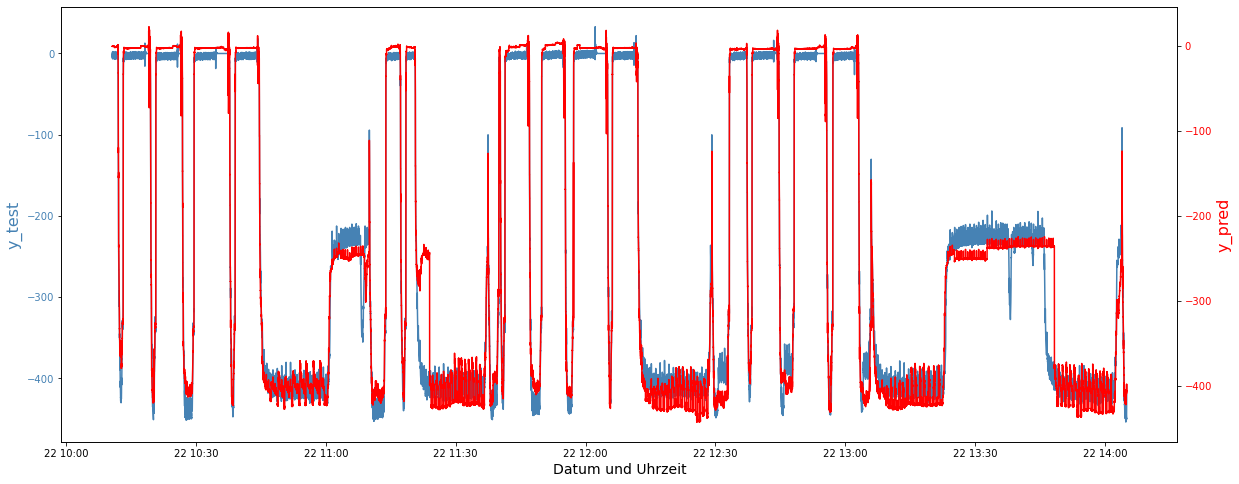

In [145]:
Daten_1 = result


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-09-22 10:10:37')&(Daten_1['CreateDateTime']<'2020-09-22 14:05:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((0.5, 6))


ax2 = ax.twinx()
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_09, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
# plt.ylim((0.5, 6))

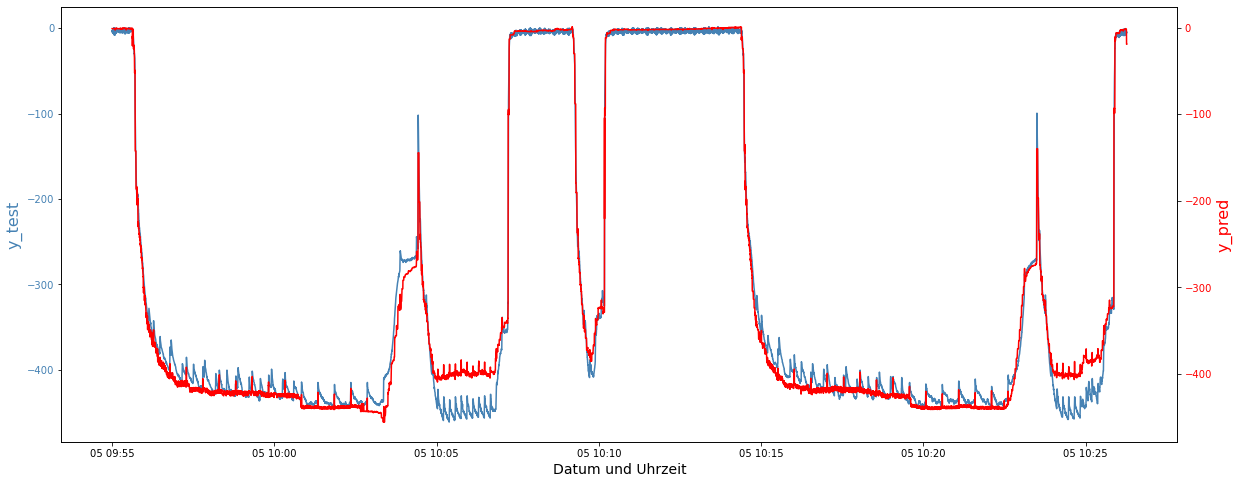

In [25]:
Daten_1 = result


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-09-05 09:55:00')&(Daten_1['CreateDateTime']<'2020-09-05 10:26:16')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((0.5, 6))


ax2 = ax.twinx()
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_09, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
# plt.ylim((0.5, 6))


In [144]:
print('预测结果的rmse是:')
print(mean_squared_error(result['y_test'], y_pred_09) ** 0.5)

预测结果的rmse是:
20.85944545765202


In [5]:
params = {
    'boosting_type': 'gbdt', 
    'objective': 'regression', 

    'learning_rate': 0.1,
    'max_depth': 10,
    'num_leaves': 100, 

    'subsample': 0.9, 
    'colsample_bytree': 0.8, 
    }

In [6]:
data_train = lgb.Dataset(X_train, y_train, silent=True)
cv_results = lgb.cv(
    params, data_train, num_boost_round=1000, nfold=5, stratified=False, shuffle=True, metrics='rmse',
    early_stopping_rounds=50, verbose_eval=50, show_stdv=True, seed=0)

print('best n_estimators:', len(cv_results['rmse-mean']))
print('best cv score:', cv_results['rmse-mean'][-1])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.647609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2883
[LightGBM] [Info] Number of data points in the train set: 8678132, number of used features: 56
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.603715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2883
[LightGBM] [Info] Number of data points in the train set: 8678132, number of used features: 56
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.597438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2883
[LightGBM] [Info] Num

In [5]:
from sklearn.model_selection import GridSearchCV
### 我们可以创建lgb的sklearn模型，使用上面选择的(学习率，评估器数目)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=50,
                              learning_rate=0.1, n_estimators=1000, max_depth=10,
                              metric='rmse', bagging_fraction = 0.8,feature_fraction = 0.8)

params_test1={
    'max_depth': range(5,12,1),
    'num_leaves':range(30, 200, 20)
}
gsearch1 = GridSearchCV(estimator=model_lgb, param_grid=params_test1, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)

In [6]:
gsearch1.fit(X_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 63 candidates, totalling 315 fits


D:\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


MemoryError: Unable to allocate 3.69 GiB for an array with shape (57, 8678135) and data type float64